In [1]:
import pandas as pd
import numpy as np

In [2]:
ds1 = pd.read_csv('datasets/kaggle/spamham.csv', encoding='ISO-8859-1')
ds1.shape

(4845, 3)

In [3]:
ds2 = pd.read_csv('datasets/uci_ml/spam.csv', encoding='ISO-8859-1')
ds2.shape

(5572, 5)

In [4]:
ds3 = pd.read_csv('datasets/spam_assassin/email_text.csv', encoding='ISO-8859-1')
ds3.shape

(5640, 2)

In [5]:
ds4 = pd.read_csv('datasets/enron_2006/email_text.csv', encoding='ISO-8859-1')
ds4.shape

(28063, 2)

In [6]:
ling = pd.read_csv('datasets/phishing/Ling.csv', encoding='ISO-8859-1')
ling.shape

(2859, 3)

In [7]:
spam_ham = pd.read_csv('datasets/phishing/spam-ham.csv', encoding='ISO-8859-1')
spam_ham.shape

(3000, 2)

In [8]:
nazario = pd.read_csv('datasets/phishing/Nazario.csv', encoding='ISO-8859-1')
nazario.shape

(1565, 7)

In [9]:
niger = pd.read_csv('datasets/phishing/Nigerian_Fraud.csv', encoding='ISO-8859-1')
niger.shape

(3332, 7)

<h3>  Methodology</h3>

<p>1. Data Cleaning</p>
<p>2. Exploratory Data Analysis</p>
<p>3. Text Preprocessing</p>
<p>4. Model Building</p>
<p>5. Evaluation</p>
<p>6. Model Improvements</p>

<h3>1. Data Cleaning</h3>
<ul style="list-style: none">
    <li>a. Drop irrelevant columns in the datasets</li>
    <li>b. Rename columns for uniformity and specific classification</li>
    <li>c. Encode relevant columns to include number representation for uniformity</li>
    <li>d. Check for and handle missing values</li>
    <li>e. Handle duplicates by keeping first occurence of the values and discarding the rest</li>
</ul>

<h4>Dataset 1 - Kaggle Spam Dataset</h4>

In [13]:
ds1.head()

Text  Class Label
0  Supply Quality China's EXCLUSIVE dimensions at...      1  spam
1                         over. SidLet me know. Thx.      0   ham
2  Dear Friend,Greetings to you.I wish to accost ...      1  spam
3  MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....      1  spam
4          Not a surprising assessment from Embassy.      0   ham

In [14]:
# Rename the columns we are interested in as there is no need to drop any columns in ds1

ds1.drop(columns = ['Label'], inplace = True)
ds1.rename(columns = {'Class': 'target', 'Text': 'text'}, inplace = True)
ds1.head()

text  target
0  Supply Quality China's EXCLUSIVE dimensions at...       1
1                         over. SidLet me know. Thx.       0
2  Dear Friend,Greetings to you.I wish to accost ...       1
3  MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....       1
4          Not a surprising assessment from Embassy.       0

In [15]:
ds1.isnull().sum()

text      0
target    0
dtype: int64

In [16]:
ds1 = ds1.drop_duplicates(keep = 'first')
ds1.duplicated().sum()

0

<p>Now, perform similar operations on the other datasets for data cleaning to obtains similar results as in ds1</p>

<h4>Dataset 2 - UCI ML Corpus</h4>

In [19]:
ds2.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [20]:
# Drop and rename the columns for ds2

ds2.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
ds2.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
ds2.head()

target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [21]:
# Import the LabelEncoder to encode the columns we are interested in using numerical representation

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [22]:
ds2['target'] = encoder.fit_transform(ds2['target'])
ds2.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [23]:
ds2.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
ds2 = ds2.drop_duplicates(keep = 'first')
ds2.duplicated().sum()

0

<h4>Dataset 3 - SpamAssassin Dataset</h4>

In [26]:
ds3.head()

label                                               text
0      0  me spam is the tool for dissident news since t...
1      0  escapenumber escapenumber escapenumber penguin...
2      0  on wednesday escapenumber july escapenumber es...
3      0   can't think of how i'd be running afoul of th...
4      0  forwarded by william knowles http www thesun c...

In [27]:
# ds3 doesn't the dropping of any columns as well so, go on to rename columns

ds3.rename(columns = {'label': 'target'}, inplace = True)
ds3.head()

target                                               text
0       0  me spam is the tool for dissident news since t...
1       0  escapenumber escapenumber escapenumber penguin...
2       0  on wednesday escapenumber july escapenumber es...
3       0   can't think of how i'd be running afoul of th...
4       0  forwarded by william knowles http www thesun c...

In [28]:
ds3.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
ds3 = ds3.drop_duplicates(keep = 'first')
ds3.duplicated().sum()

0

<h4>Dataset 4 - Enron Spam Dataset</h4>

In [31]:
ds4.head()

label                                               text
0      0  wrong bill grace i ' ll forward original messa...
1      0  i have continued the hilcorp old ocean deal da...
2      0  several related issues have resulted in an inc...
3      0  one year rate for this one will be escapenumbe...
4      0  attached is the weekly deal report for escapen...

In [32]:
ds4.rename(columns = {'label': 'target'}, inplace = True)
ds4.head()

target                                               text
0       0  wrong bill grace i ' ll forward original messa...
1       0  i have continued the hilcorp old ocean deal da...
2       0  several related issues have resulted in an inc...
3       0  one year rate for this one will be escapenumbe...
4       0  attached is the weekly deal report for escapen...

In [33]:
ds4.isnull().sum()

target    0
text      0
dtype: int64

In [34]:
ds4 = ds4.drop_duplicates(keep = 'first')
ds4.duplicated().sum()

0

<h4>Dataset 5 - Kaggle Phishing Dataset</h4>

In [36]:
ling.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                                body  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [37]:
ling.drop(columns = ['subject'], inplace = True)
ling.rename(columns = {'body': 'text', 'label': 'target'}, inplace = True)

ling.head()

text  target
0  content - length : 3386 apple-iss research cen...       0
1  lang classification grimes , joseph e . and ba...       0
2  i am posting this inquiry for sergei atamas ( ...       0
3  a colleague and i are researching the differin...       0
4  earlier this morning i was on the phone with a...       0

In [38]:
spam_ham.head()

email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0

In [39]:
spam_ham.rename(columns = {'email': 'text', 'label': 'target'}, inplace = True)

spam_ham.head()

text  target
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...       0
1  martin a posted tassos papadopoulos the greek ...       0
2  man threatens explosion in moscow thursday aug...       0
3  klez the virus that won t die already the most...       0
4   in adding cream to spaghetti carbonara which ...       0

In [40]:
nazario.head()

sender  \
0  Mail System Internal Data <MAILER-DAEMON@monke...   
1                        cPanel <service@cpanel.com>   
2    Microsoft Outlook <recepcao@unimedceara.com.br>   
3                     Ann Garcia <AnGarcia@mcoe.org>   
4                 "USAA" <usaaacctupdate@sccu4u.com>   

                                 receiver  \
0                                     NaN   
1                         jose@monkey.org   
2                                     NaN   
3     "info@maaaaa.org" <info@maaaaa.org>   
4  Recipients <usaaacctupdate@sccu4u.com>   

                                    date  \
0             28 Sep 2017 09:57:25 -0400   
1        Fri, 30 Oct 2015 00:00:48 -0500   
2  Fri, 30 Oct 2015 06:21:59 -0300 (BRT)   
3        Fri, 30 Oct 2015 14:54:33 +0000   
4        Fri, 30 Oct 2015 14:02:33 -0500   

                                             subject  \
0  DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA   
1                                Verify Your Account   
2                          Helpdesk Mailbox Alert!!!   
3                               IT-Service Help Desk   
4      Final USAA Reminder - Update Your Account Now   

                                                body  urls  label  
0  This text is part of the internal format of yo...     1      1  
1  Business with  \t\t\t\t\t\t\t\tcPanel & WHM \t...     1      1  
2  Your two incoming mails were placed on pending...     1      1  
3  Password will expire in 3 days. Click Here To ...     0      1  
4  To ensure delivery to your inbox, please add U...     1      1

In [41]:
nazario.drop(columns = ['sender', 'receiver', 'date', 'subject', 'urls'], inplace = True)
nazario.rename(columns = {'body': 'text', 'label': 'target'}, inplace = True)

nazario.head()

text  target
0  This text is part of the internal format of yo...       1
1  Business with  \t\t\t\t\t\t\t\tcPanel & WHM \t...       1
2  Your two incoming mails were placed on pending...       1
3  Password will expire in 3 days. Click Here To ...       1
4  To ensure delivery to your inbox, please add U...       1

In [42]:
niger.head()

sender              receiver  \
0  MR. JAMES NGOLA. <james_ngola2002@maktoob.com>  webmaster@aclweb.org   
1  Mr. Ben Suleman <bensul2004nng@spinfinder.com>                   R@M   
2       PRINCE OBONG ELEME <obong_715@epatra.com>  webmaster@aclweb.org   
3       PRINCE OBONG ELEME <obong_715@epatra.com>  webmaster@aclweb.org   
4              Maryam Abacha <m_abacha03@www.com>                   R@M   

                              date  \
0  Thu, 31 Oct 2002 02:38:20 +0000   
1  Thu, 31 Oct 2002 05:10:00 -0000   
2  Thu, 31 Oct 2002 22:17:55 +0100   
3  Thu, 31 Oct 2002 22:44:20 -0000   
4  Fri, 01 Nov 2002 01:45:04 +0100   

                                      subject  \
0  URGENT BUSINESS ASSISTANCE AND PARTNERSHIP   
1         URGENT ASSISTANCE /RELATIONSHIP (P)   
2                             GOOD DAY TO YOU   
3                             GOOD DAY TO YOU   
4                     I Need Your Assistance.   

                                                body  urls  label  
0  FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...     0      1  
1  Dear Friend,\n\nI am Mr. Ben Suleman a custom ...     0      1  
2  FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...     0      1  
3  FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...     0      1  
4  Dear sir, \n \nIt is with a heart full of hope...     0      1

In [43]:
niger.drop(columns = ['sender', 'receiver', 'date', 'subject', 'urls'], inplace = True)
niger.rename(columns = {'body': 'text', 'label': 'target'}, inplace = True)

niger.head()

text  target
0  FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...       1
1  Dear Friend,\n\nI am Mr. Ben Suleman a custom ...       1
2  FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...       1
3  FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...       1
4  Dear sir, \n \nIt is with a heart full of hope...       1

In [44]:
# initialize a dataframe variable and set to the concatenated result of the four datasets 

ds5 = pd.concat([ling, spam_ham, nazario, niger], ignore_index = True)

ds5.shape

(10756, 2)

In [45]:
ds5.isnull().sum()

text      1
target    0
dtype: int64

In [46]:
ds5 = ds5.drop_duplicates(keep = 'first')
ds5.duplicated().sum()

0

In [47]:
print('ds1:', ds1.shape, ' ds2:' , ds2.shape, ' ds3:', ds3.shape, ' ds4:', ds4.shape, ' ds5:', ds5.shape)

ds1: (4339, 2)  ds2: (5169, 2)  ds3: (5640, 2)  ds4: (28063, 2)  ds5: (10628, 2)


<h3>2. EDA - Exploratory Data Analysis</h3>


In [49]:
ds1.sample(5)

text  target
1050  Dear Sir,I am Memuna Mousa from Kuwait. I am m...       1
1377  /1/hi/world/europe/859479.stm"><U><FONT color=...       1
2166  Will do. Still waiting on a call-back from his...       0
1664  Barb--I loved your comments at your re-electio...       0
1392  H <hrod17@clintonemail.com>Saturday February 1...       0

In [50]:
ds2.sample(5)

target                                               text
3849       0  I to am looking forward to all the sex cuddlin...
1130       0                          Howz pain?hope u r fine..
4751       0  Well boy am I glad G wasted all night at apple...
4937       0  No it was cancelled yeah baby! Well that sound...
1766       1  SMS AUCTION You have won a Nokia 7250i. This i...

In [51]:
ds3.sample(5)

target                                               text
2878       0   in forteana y jayne ayris wrote think of a le...
3165       0   tim on my box the current system scores about...
3250       0  on mon escapenumber jul escapenumber adam rifk...
2500       0   joe p s i hate everybody one up i hate everyt...
5139       1  there are more financial opportunities out the...

In [52]:
ds4.sample(5)

target                                               text
19839       1  cum witness the most extreme sexual achievemen...
12469       0  so shall i get word out i would actually prefe...
12468       0  we are in need of a escapenumber inch t v set ...
6574        0  i don ' t understand what is happening on the ...
20817       1  bilge francisco cauliflower get all your presc...

In [53]:
ds5.sample(5)

text  target
10211  \r\nBeloved In Christ,\r\n \r\nI am Ms Sharma ...       1
9261   \nDear Sir,\n\nMay I use this medium to introd...       1
4869   url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...       0
2929   on fri NUMBER aug NUMBER robert harley wrote n...       0
4345   on mon NUMBER sep NUMBER justin mason wrote si...       0

<p>Check for the count of spam and ham mails in the datasets using the 'target' column</p>

In [55]:
ds1['target'].value_counts()

target
0    2419
1    1920
Name: count, dtype: int64

In [56]:
ds2['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [57]:
ds3['target'].value_counts()

target
0    4072
1    1568
Name: count, dtype: int64

In [58]:
ds4['target'].value_counts()

target
0    14287
1    13776
Name: count, dtype: int64

In [59]:
ds5['target'].value_counts()

target
1    5782
0    4846
Name: count, dtype: int64

<p>Import the pyplot package from the Matplotlib library and plot charts(pie chat) showing the relationship between the ham and spam mails for the datasets</p>

In [61]:
import matplotlib.pyplot as plt

<h5>Dataset 1</h5>

([<matplotlib.patches.Wedge at 0x129288950>,
 [Text(-0.19763271585166972, 1.082100415684743, 'Ham'),
  Text(0.1976327158516698, -1.082100415684743, 'Spam')],
 [Text(-0.10779966319181984, 0.5902365903734961, '55.75'),
  Text(0.10779966319181988, -0.5902365903734961, '44.25')])

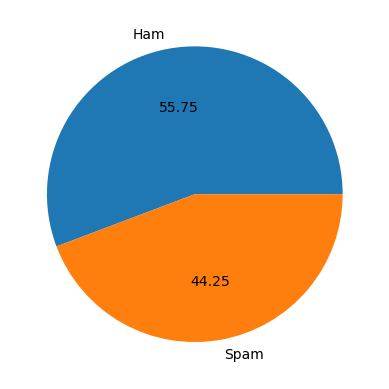

In [63]:
plt.pie(ds1['target'].value_counts(), labels = ['Ham', 'Spam'], autopct = '%0.2f')

<h5>Dataset 2</h5>

([<matplotlib.patches.Wedge at 0x1292dcc10>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

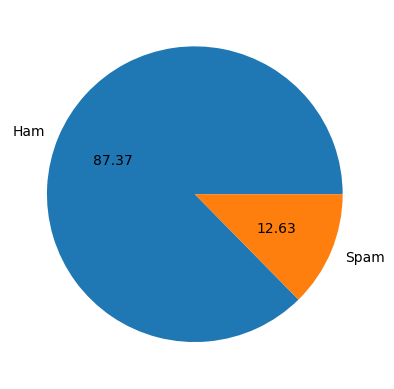

In [65]:
plt.pie(ds2['target'].value_counts(), labels = ['Ham', 'Spam'], autopct = '%0.2f')

<h5>Dataset 3</h5>

([<matplotlib.patches.Wedge at 0x129454c10>,
 [Text(-0.7064403496075743, 0.8431737854359137, 'Ham'),
  Text(0.7064403496075737, -0.8431737854359143, 'Spam')],
 [Text(-0.38533109978594954, 0.4599129738741347, '72.20'),
  Text(0.3853310997859493, -0.459912973874135, '27.80')])

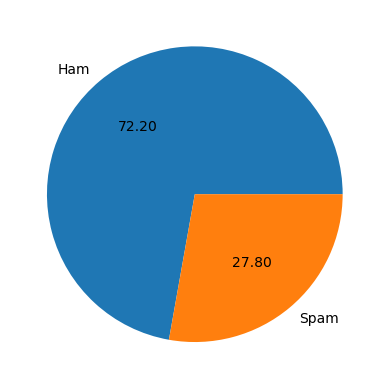

In [67]:
plt.pie(ds3['target'].value_counts(), labels = ['Ham', 'Spam'], autopct = '%0.2f')

<h5>Dataset 4</h5>

([<matplotlib.patches.Wedge at 0x12946bd10>,
 [Text(-0.0314585699255418, 1.0995500708827406, 'Ham'),
  Text(0.03145846697823373, -1.0995500738280997, 'Spam')],
 [Text(-0.017159219959386435, 0.5997545841178584, '50.91'),
  Text(0.017159163806309306, -0.599754585724418, '49.09')])

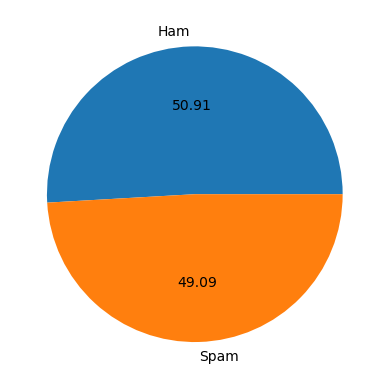

In [69]:
plt.pie(ds4['target'].value_counts(), labels = ['Ham', 'Spam'], autopct = '%0.2f')

<h5>Dataset 5</h5>

([<matplotlib.patches.Wedge at 0x1294f7a10>,
 [Text(-0.15168774823851686, 1.0894910862573997, 'Ham'),
  Text(0.15168764623299885, -1.0894911004594268, 'Spam')],
 [Text(-0.08273877176646373, 0.5942678652313088, '54.40'),
  Text(0.08273871612709027, -0.5942678729778691, '45.60')])

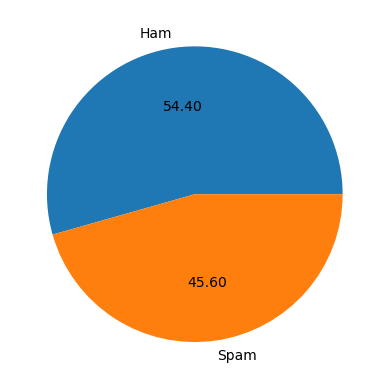

In [71]:
plt.pie(ds5['target'].value_counts(), labels = ['Ham', 'Spam'], autopct = '%0.2f')

<h4>Comprehensive Text Analysis</h4>

<ul style="list-style: none">
    <li>a. Import packages such as the nltk - Natural Language Toolkit which holds the library for text processing features like stemming, classification, tokenization and so on, and the seaborn package for making plots <li>
    <li>b. Tokenize the datasets using the lambda function of the nltk library to draw out statistical categories like 'number of characters', 'number of words', and 'number of sentences'.</li>
    <li>c. Then describe these categories with various statistical metrics like mean, variance, standard deviation, and so on.</li>
    <li>d. Make other plots such as; 
        <ul style="list-style: none">
            <li>i. a histogram plot for the number of characters versus their counts, same for number of words.</li>
            <li>ii. a scatter grid for the targets </li>
            <li>iii. Make a heatmap representation of the corresponding number representations of the target </li>
        </ul>
    </li>
</ul>

In [73]:
import nltk
import seaborn as sns

nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


False

<h4>Dataset 1</h4>

In [75]:
ds1['num_characters'] = ds1['text'].apply(len)
ds1['num_words'] = ds1['text'].apply(lambda x:len(nltk.word_tokenize(x)))
ds1['num_sentences'] = ds1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

ds1.head()

text  target  num_characters  \
0  Supply Quality China's EXCLUSIVE dimensions at...       1            1121   
1                         over. SidLet me know. Thx.       0              26   
2  Dear Friend,Greetings to you.I wish to accost ...       1            2174   
3  MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....       1            3481   
4          Not a surprising assessment from Embassy.       0              41   

   num_words  num_sentences  
0        192              4  
1          8              3  
2        436             15  
3        656             17  
4          7              1

In [76]:
ds1[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     4339.000000  4339.000000    4339.000000
mean      1283.864715   217.879004       5.299147
std       2183.256892   322.392328       9.220016
min          1.000000     0.000000       0.000000
25%         79.000000    16.000000       1.000000
50%        352.000000    61.000000       2.000000
75%       2181.500000   379.500000       6.000000
max      31636.000000  5125.000000     205.000000

In [77]:
# Describe the above for Ham messages

ds1[ds1['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     2419.000000  2419.000000    2419.000000
mean       484.125672    86.340637       3.620918
std       1774.192281   310.270762      10.347186
min          1.000000     1.000000       1.000000
25%         39.000000     9.000000       1.000000
50%         94.000000    19.000000       1.000000
75%        210.000000    42.000000       3.000000
max      30898.000000  5125.000000     205.000000

In [78]:
# Describe the same way for Spam messages

ds1[ds1['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     1920.000000  1920.000000    1920.000000
mean      2291.452604   383.603646       7.413542
std       2233.138941   253.701617       7.017051
min          1.000000     0.000000       0.000000
25%       1210.000000   196.750000       1.000000
50%       2201.000000   385.000000       5.000000
75%       3086.000000   536.250000      11.000000
max      31636.000000  2933.000000      96.000000

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

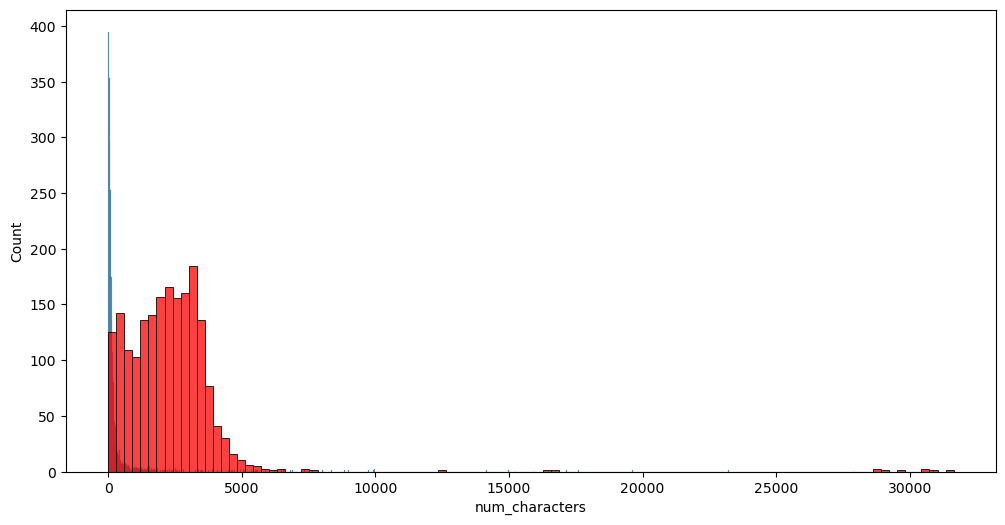

In [79]:
# Use the seaborn package to make a plot for the number of words in both the spam and ham classes

plt.figure(figsize = (12, 6))
sns.histplot(ds1[ds1['target'] == 0]['num_characters'])
sns.histplot(ds1[ds1['target'] == 1]['num_characters'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

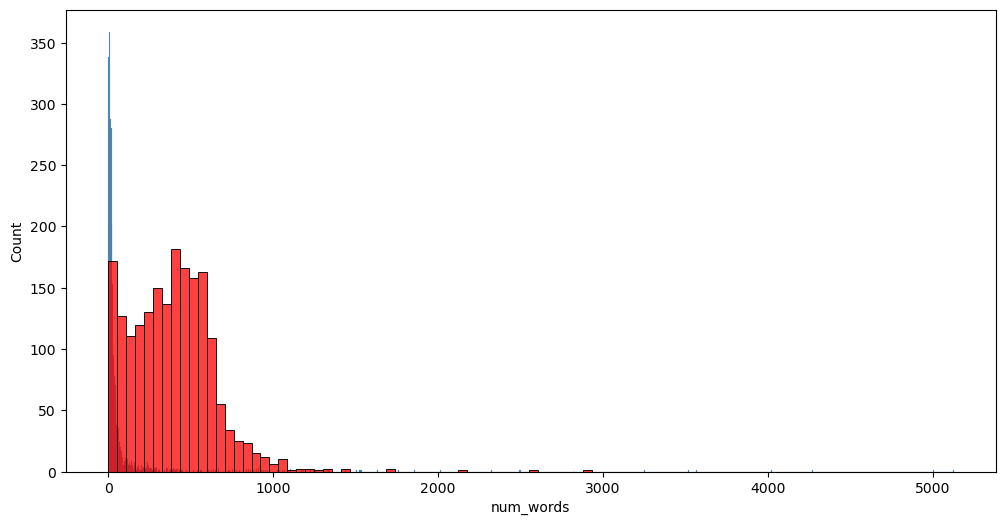

In [80]:
# Same histogram plot but with number of words

plt.figure(figsize = (12, 6))
sns.histplot(ds1[ds1['target'] == 0]['num_words'])
sns.histplot(ds1[ds1['target'] == 1]['num_words'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


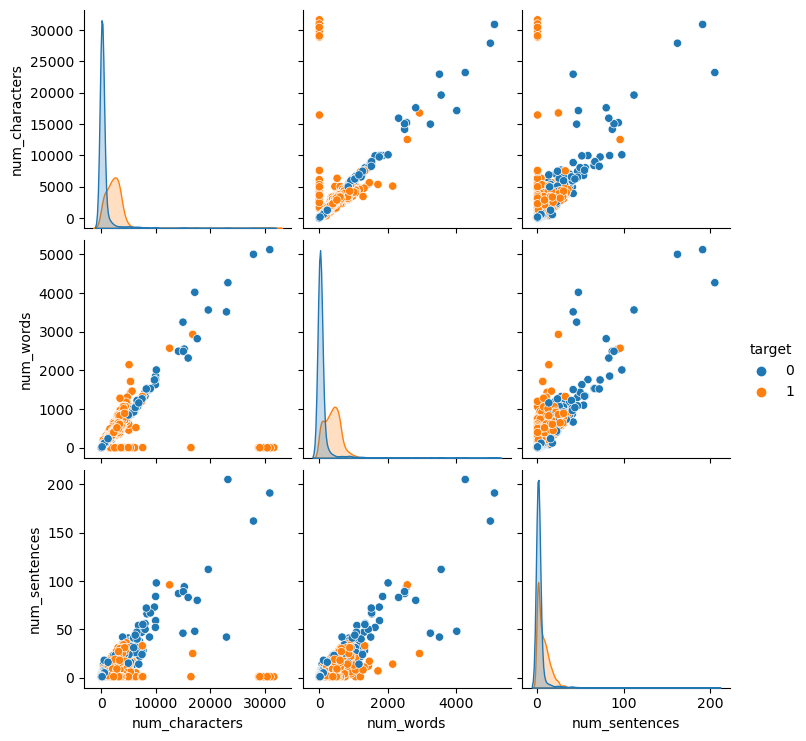

In [81]:
# Plot a scatter grid for the target to identify spam and ham mails

sns.pairplot(ds1, hue = 'target')

<Axes: >

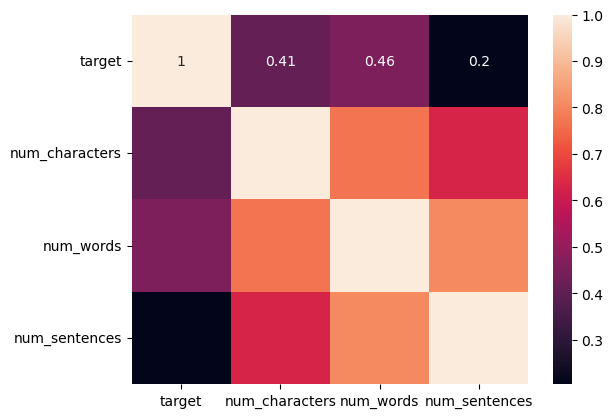

In [82]:
# Make a heatmap representation of the corresponding number representations of the target data

sns.heatmap(ds1.corr(numeric_only=True), annot=True)

<p>Repeat the procedures for the other datasets</p>

<h4>Dataset 2</h4>

In [85]:
ds2['num_characters'] = ds2['text'].apply(len)
ds2['num_words'] = ds2['text'].apply(lambda x:len(nltk.word_tokenize(x)))
ds2['num_sentences'] = ds2['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

ds2.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [86]:
ds2[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [87]:
ds2[ds2['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [88]:
ds2[ds2['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

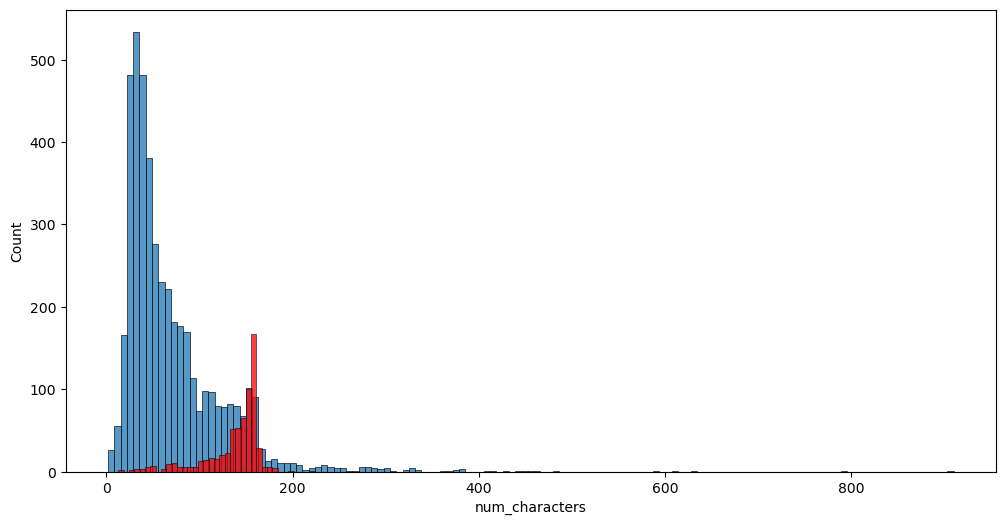

In [89]:
plt.figure(figsize = (12, 6))
sns.histplot(ds2[ds2['target'] == 0]['num_characters'])
sns.histplot(ds2[ds2['target'] == 1]['num_characters'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

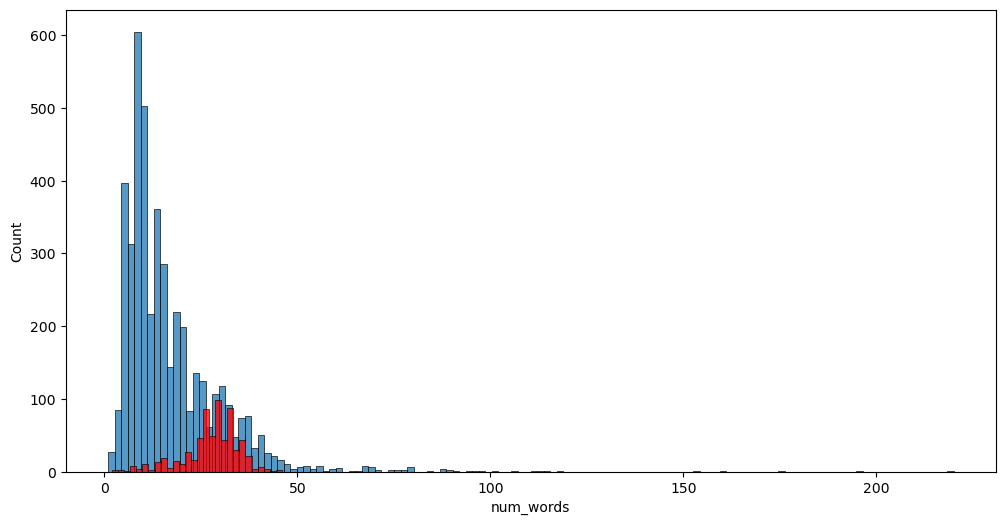

In [90]:
plt.figure(figsize = (12, 6))
sns.histplot(ds2[ds2['target'] == 0]['num_words'])
sns.histplot(ds2[ds2['target'] == 1]['num_words'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


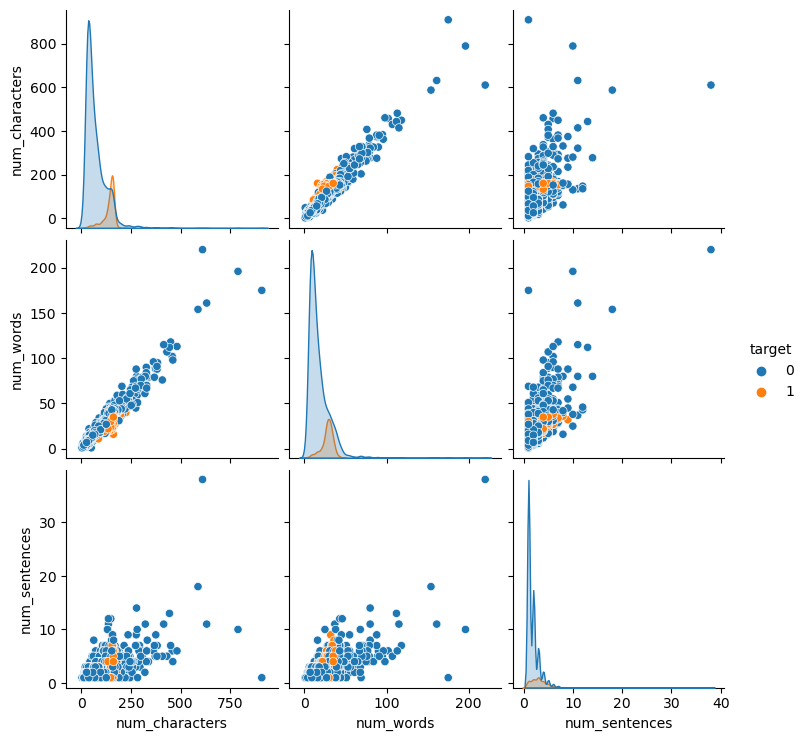

In [91]:
sns.pairplot(ds2, hue = 'target')

<Axes: >

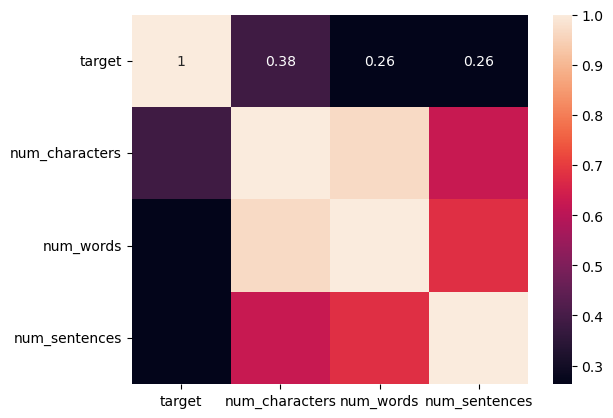

In [92]:
sns.heatmap(ds2.corr(numeric_only=True), annot=True)

<h4>Dataset 3</h4>

In [94]:
ds3['num_characters'] = ds3['text'].apply(len)
ds3['num_words'] = ds3['text'].apply(lambda x:len(nltk.word_tokenize(x)))
ds3['num_sentences'] = ds3['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

ds3.head()

target                                               text  num_characters  \
0       0  me spam is the tool for dissident news since t...             902   
1       0  escapenumber escapenumber escapenumber penguin...           16688   
2       0  on wednesday escapenumber july escapenumber es...            1709   
3       0   can't think of how i'd be running afoul of th...            2284   
4       0  forwarded by william knowles http www thesun c...            1554   

   num_words  num_sentences  
0        184              1  
1       2897              1  
2        320              1  
3        389              1  
4        269              1

In [95]:
ds3[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters     num_words  num_sentences
count     5640.000000   5640.000000         5640.0
mean      1974.247872    317.650887            1.0
std       4847.626573    735.767479            0.0
min         11.000000      1.000000            1.0
25%        561.000000     94.750000            1.0
50%        989.500000    165.500000            1.0
75%       1711.250000    288.000000            1.0
max     159153.000000  24719.000000            1.0

In [96]:
ds3[ds3['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters     num_words  num_sentences
count     4072.000000   4072.000000         4072.0
mean      1763.381385    292.661591            1.0
std       4475.633380    714.970581            0.0
min         31.000000      6.000000            1.0
25%        517.000000     88.000000            1.0
50%        938.000000    160.000000            1.0
75%       1614.000000    275.250000            1.0
max     159153.000000  24719.000000            1.0

In [97]:
ds3[ds3['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters     num_words  num_sentences
count     1568.000000   1568.000000         1568.0
mean      2521.855230    382.546556            1.0
std       5666.487316    783.737832            0.0
min         11.000000      1.000000            1.0
25%        680.000000    111.750000            1.0
50%       1072.000000    175.000000            1.0
75%       2114.250000    332.500000            1.0
max      81041.000000  11979.000000            1.0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

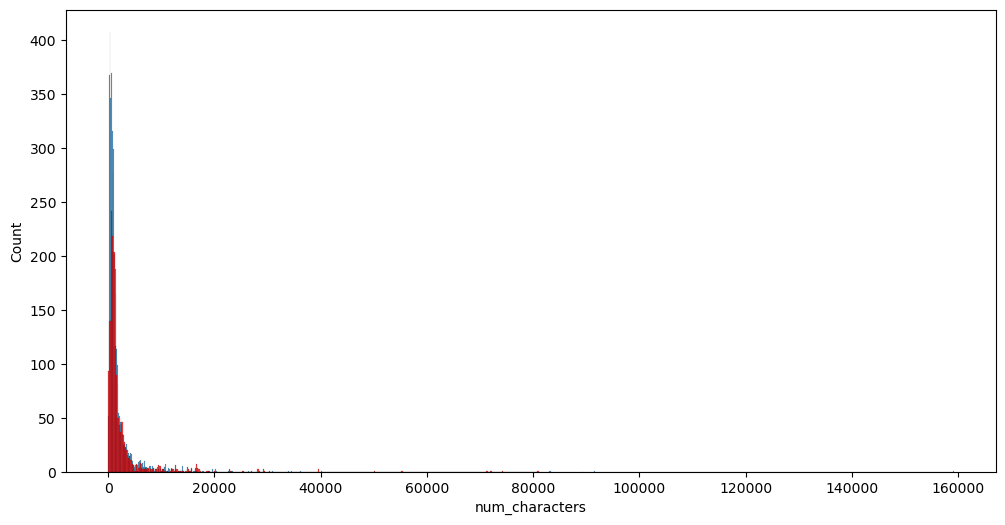

In [98]:
plt.figure(figsize = (12, 6))
sns.histplot(ds3[ds3['target'] == 0]['num_characters'])
sns.histplot(ds3[ds3['target'] == 1]['num_characters'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

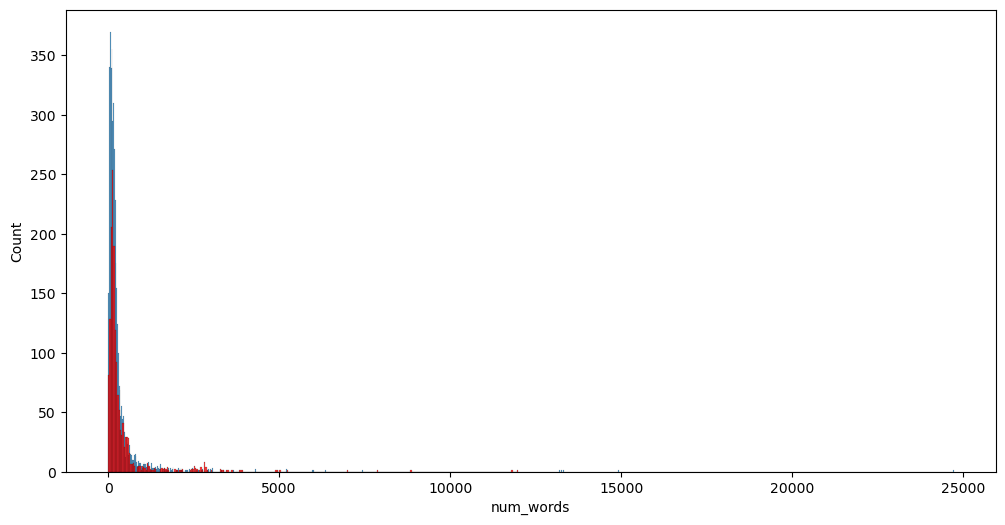

In [99]:
plt.figure(figsize = (12, 6))
sns.histplot(ds3[ds3['target'] == 0]['num_words'])
sns.histplot(ds3[ds3['target'] == 1]['num_words'], color = 'red')

sns.pairplot(ds3, hue = 'target')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

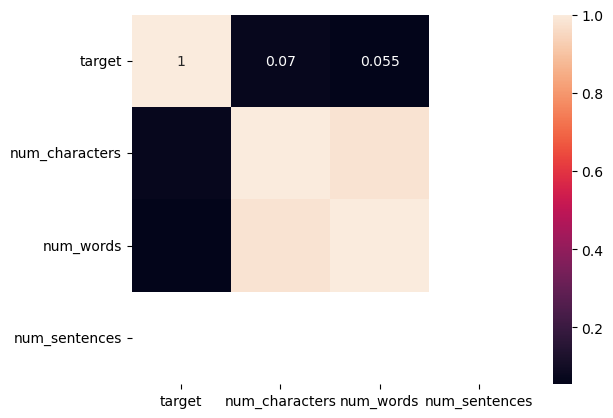

In [101]:
sns.heatmap(ds3.corr(numeric_only=True), annot=True)

<h4>Dataset 4</h4>

In [103]:
ds4['num_characters'] = ds4['text'].apply(len)
ds4['num_words'] = ds4['text'].apply(lambda x:len(nltk.word_tokenize(x)))
ds4['num_sentences'] = ds4['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

ds4.head()

target                                               text  num_characters  \
0       0  wrong bill grace i ' ll forward original messa...            1679   
1       0  i have continued the hilcorp old ocean deal da...             661   
2       0  several related issues have resulted in an inc...            3767   
3       0  one year rate for this one will be escapenumbe...             688   
4       0  attached is the weekly deal report for escapen...             179   

   num_words  num_sentences  
0        261              1  
1        111              1  
2        585              1  
3        110              1  
4         22              1

In [104]:
ds4[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters     num_words  num_sentences
count    28063.000000  28063.000000        28063.0
mean      1528.627018    245.703275            1.0
std       4358.365755    708.541493            0.0
min          2.000000      1.000000            1.0
25%        350.000000     56.000000            1.0
50%        728.000000    118.000000            1.0
75%       1624.000000    258.000000            1.0
max     234786.000000  38067.000000            1.0

In [105]:
ds4[ds4['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters     num_words  num_sentences
count    14287.000000  14287.000000        14287.0
mean      1729.554980    280.556170            1.0
std       5778.031468    942.971768            0.0
min          2.000000      1.000000            1.0
25%        386.000000     62.000000            1.0
50%        858.000000    140.000000            1.0
75%       1752.500000    284.000000            1.0
max     234786.000000  38067.000000            1.0

In [106]:
ds4[ds4['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters     num_words  num_sentences
count    13776.000000  13776.000000        13776.0
mean      1320.245935    209.557564            1.0
std       1996.825445    313.007936            0.0
min          4.000000      1.000000            1.0
25%        322.000000     52.000000            1.0
50%        609.500000    100.000000            1.0
75%       1383.250000    220.000000            1.0
max      52231.000000   5997.000000            1.0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

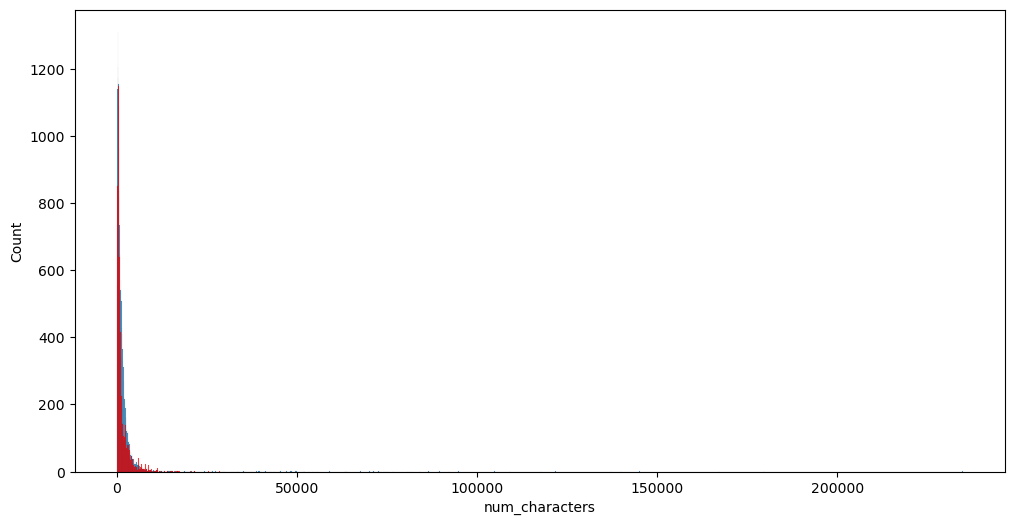

In [107]:
plt.figure(figsize = (12, 6))
sns.histplot(ds4[ds4['target'] == 0]['num_characters'])
sns.histplot(ds4[ds4['target'] == 1]['num_characters'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

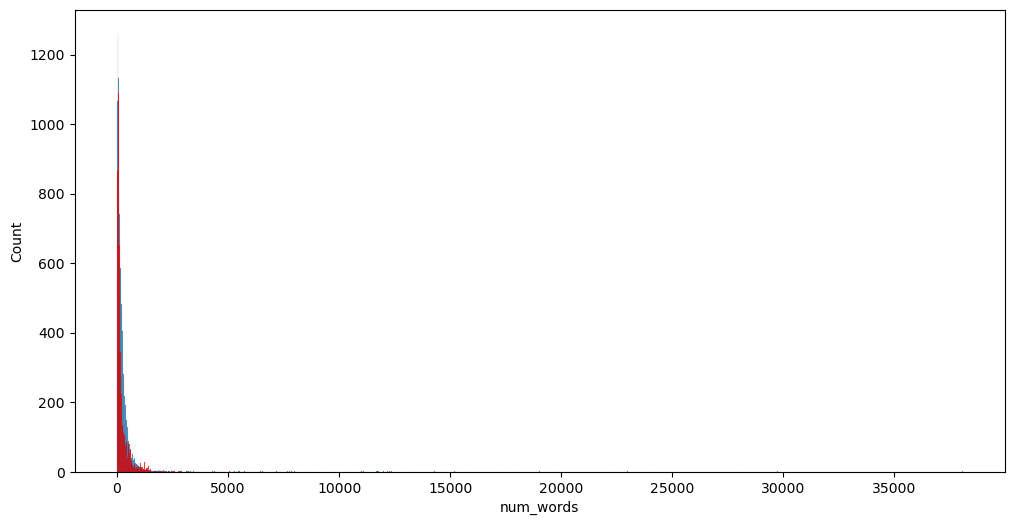

In [108]:
plt.figure(figsize = (12, 6))
sns.histplot(ds4[ds4['target'] == 0]['num_words'])
sns.histplot(ds4[ds4['target'] == 1]['num_words'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


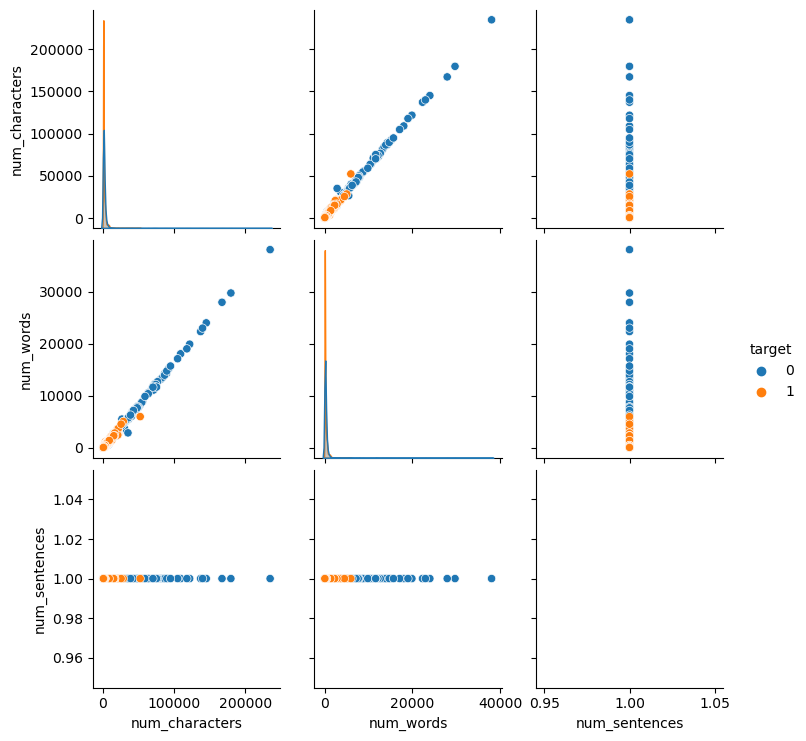

In [109]:
sns.pairplot(ds4, hue = 'target')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

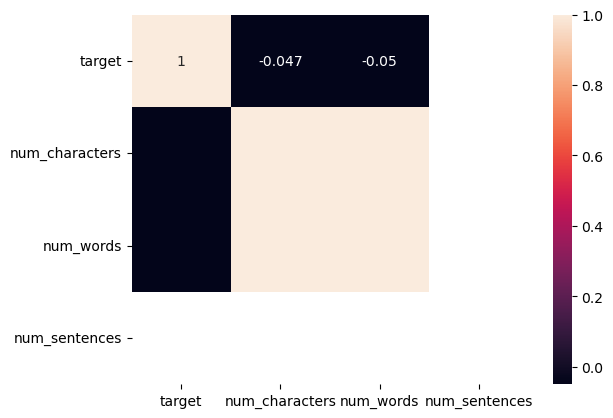

In [110]:
sns.heatmap(ds4.corr(numeric_only=True), annot=True)

<h4>Dataset 5</h4>

In [112]:
ds5['text'] = ds5['text'].fillna('')
ds5['text'] = ds5['text'].astype(str)

ds5['num_characters'] = ds5['text'].apply(len)
ds5['num_words'] = ds5['text'].apply(lambda x:len(nltk.word_tokenize(x)))
ds5['num_sentences'] = ds5['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

ds5.head()

text  target  num_characters  \
0  content - length : 3386 apple-iss research cen...       0            2857   
1  lang classification grimes , joseph e . and ba...       0            1801   
2  i am posting this inquiry for sergei atamas ( ...       0            1436   
3  a colleague and i are researching the differin...       0             325   
4  earlier this morning i was on the phone with a...       0            1045   

   num_words  num_sentences  
0        584             22  
1        344             35  
2        280             19  
3         60              4  
4        232             12

In [113]:
ds5[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters      num_words  num_sentences
count    1.062800e+04   10628.000000   10628.000000
mean     2.788958e+03     465.502540      19.144994
std      4.583834e+04    2507.070314      50.640740
min      0.000000e+00       0.000000       0.000000
25%      6.990000e+02     128.000000       1.000000
50%      1.566500e+03     292.000000      10.000000
75%      2.879000e+03     542.000000      20.000000
max      4.600438e+06  183121.000000    1530.000000

In [114]:
ds5[ds5['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters     num_words  num_sentences
count     4846.000000   4846.000000    4846.000000
mean      2176.107099    421.410235      20.933141
std       3336.843621    639.338023      61.368410
min          5.000000      1.000000       1.000000
25%        549.000000     99.000000       1.000000
50%       1162.000000    217.000000       1.000000
75%       2509.250000    476.750000      20.000000
max      82994.000000  13309.000000    1500.000000

In [115]:
ds5[ds5['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters      num_words  num_sentences
count    5.782000e+03    5782.000000    5782.000000
mean     3.302600e+03     502.457108      17.646316
std      6.206902e+04    3347.932986      39.407543
min      0.000000e+00       0.000000       0.000000
25%      9.127500e+02     163.000000       6.000000
50%      1.995000e+03     372.000000      13.000000
75%      2.995500e+03     562.000000      20.000000
max      4.600438e+06  183121.000000    1530.000000

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

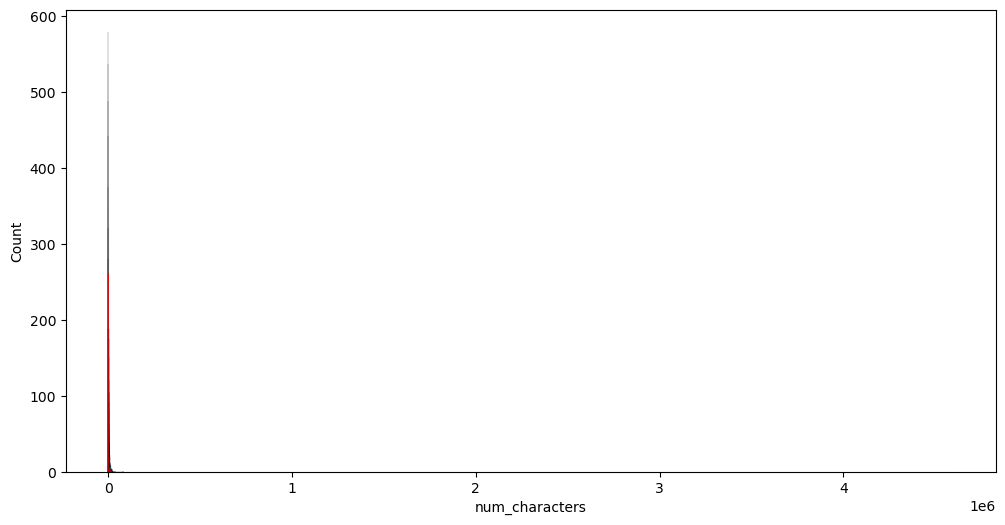

In [116]:
plt.figure(figsize = (12, 6))
sns.histplot(ds5[ds5['target'] == 0]['num_characters'])
sns.histplot(ds5[ds5['target'] == 1]['num_characters'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

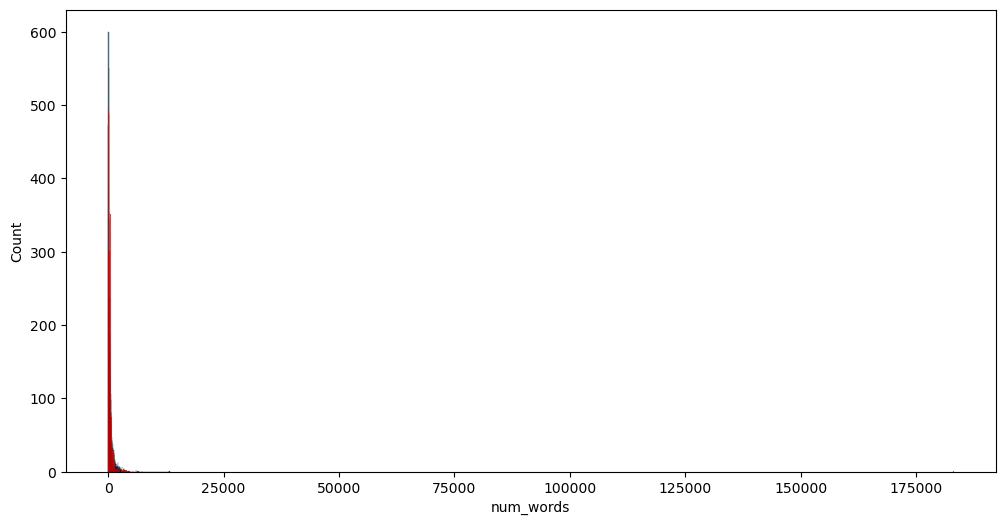

In [117]:
plt.figure(figsize = (12, 6))
sns.histplot(ds5[ds5['target'] == 0]['num_words'])
sns.histplot(ds5[ds5['target'] == 1]['num_words'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


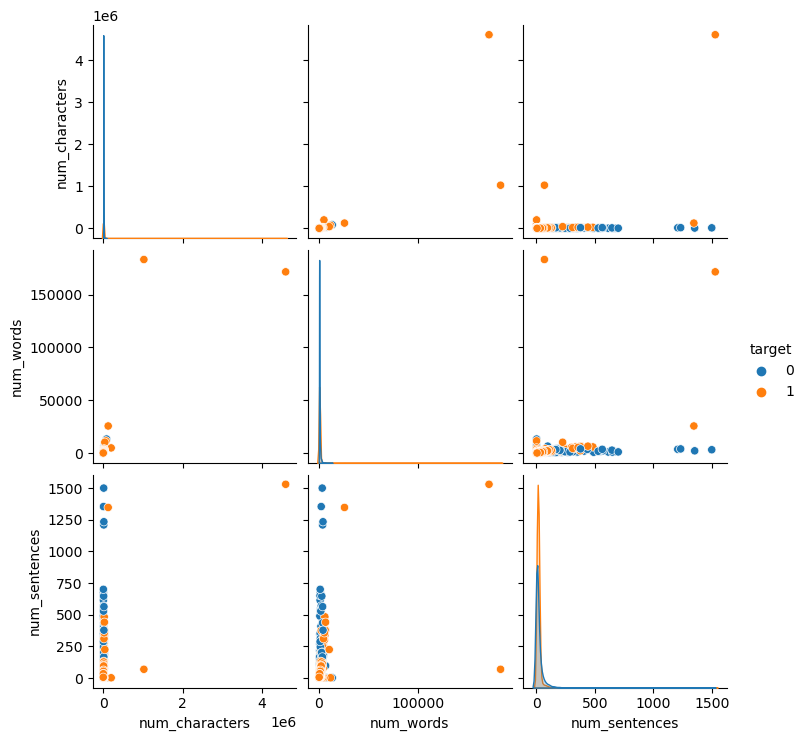

In [118]:
sns.pairplot(ds5, hue = 'target')

<Axes: >

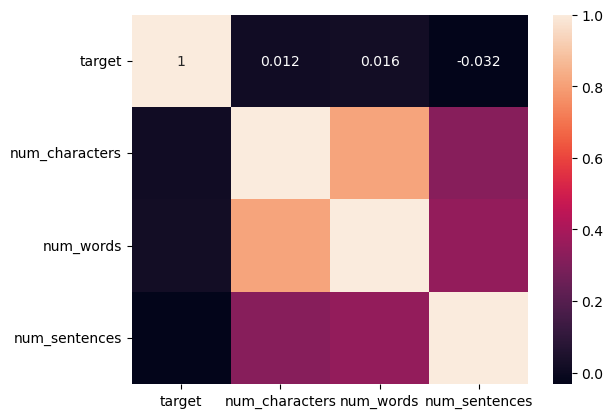

In [119]:
sns.heatmap(ds5.corr(numeric_only=True), annot=True)

<h3>3. Data Preprocessing</h3>
<ul style="list-style:none">
    <li>a. Lowercase conversion: Convert all samples to lowercase. This ensures correct analysis and classification</li>
    <li>b. Tokenization: Break up sentences into individual words and pack them into an array</li>
    <li>c. Removing special characters</li>
    <li>d. Removing stopwords and punctuation: Import the stopwords package from the corpus section of the nltk library. This is an array of very common day to day English words that are used in natural language and communication. Also import punctuation package from the string library, this would help deal with special characters</li>
    <li>e. Stemmig: Import the PorterStemmer package from the nltk library, intialize it for easy use. The package is used for stemmming (shortening words to their base form)</li>
</ul>

In [121]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('INseMinaTION')

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


'insemin'

<p>These steps can easily be packed into a function. The function is defined to turn input to lower case and tokenize them. It makes use of the stopwords and punctuation packages from the library to filter out unnecessary parts of the mail samples in our array. So altogether, the function filters out symbols and special characters, coverts to lowercase and then stems(shortens) the mail messages</p>

In [123]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    special_characters = '"""€£¥₩฿₽₹$¢₡₵₫€ƒ₲₴₭₺₦₱£元円₮₩៛₣₢₥₰₯₠₧₣₤₳₢₰₧₨₪₭₥₦₱₶₷₸₺₼₽₾₴₹₸₻₽₿฿$¢"""'


    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation + special_characters:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return ' '.join(y)

<ul>
    <li>Import the the wordcloud package from the wordcloud library and use it to to generate a grid of the various words in the data frame and get the groups of spam and ham mails. Also import the Counter package from the collections library to use the counter function</li>
    <li><p>Also, import a counter package from the collections library which and get the count of each word in the list or even attributes like the most common words and then, make a plot for the words and their counts</p></li>
    
</ul>

In [125]:
from wordcloud import WordCloud
from collections import Counter

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

<h4>Dataset 1</h4>

In [127]:
ds1['transformed_text'] = ds1['text'].apply(transform_text)
ds1.head()

text  target  num_characters  \
0  Supply Quality China's EXCLUSIVE dimensions at...       1            1121   
1                         over. SidLet me know. Thx.       0              26   
2  Dear Friend,Greetings to you.I wish to accost ...       1            2174   
3  MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....       1            3481   
4          Not a surprising assessment from Embassy.       0              41   

   num_words  num_sentences                                   transformed_text  
0        192              4  suppli qualiti china exclus dimens unbeat sir ...  
1          8              3                                    sidlet know thx  
2        436             15  dear friend greet wish accost request would im...  
3        656             17  cheung puihang seng bank voeux rd branch centr...  
4          7              1                             surpris assess embassi

<p>Next, generate a WordCloud for spam messages the and make a plot to represent them</p>

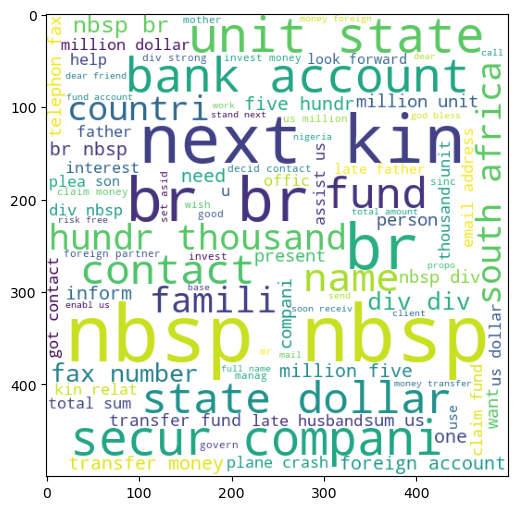

In [129]:
spam_wc = wc.generate(ds1[ds1['target'] == 1]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

<p>Do the same for ham messages</p>

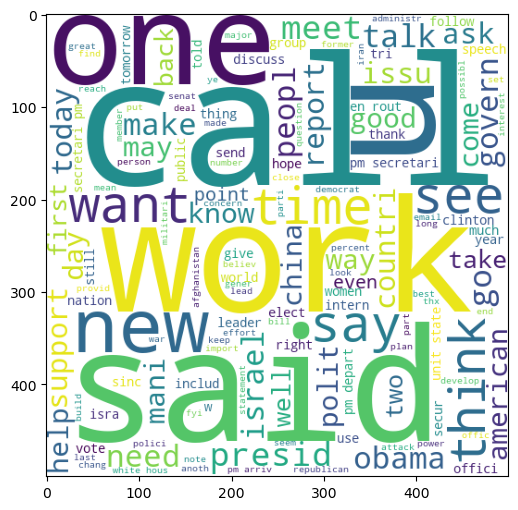

In [131]:
ham_wc = wc.generate(ds1[ds1['target'] == 0]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [132]:
ds1.head()

text  target  num_characters  \
0  Supply Quality China's EXCLUSIVE dimensions at...       1            1121   
1                         over. SidLet me know. Thx.       0              26   
2  Dear Friend,Greetings to you.I wish to accost ...       1            2174   
3  MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....       1            3481   
4          Not a surprising assessment from Embassy.       0              41   

   num_words  num_sentences                                   transformed_text  
0        192              4  suppli qualiti china exclus dimens unbeat sir ...  
1          8              3                                    sidlet know thx  
2        436             15  dear friend greet wish accost request would im...  
3        656             17  cheung puihang seng bank voeux rd branch centr...  
4          7              1                             surpris assess embassi

<p>Initialize a list and then split up the individul words of each sentence in the transformed text and append them to the list</p>

In [134]:
ds1_spam_corpus = []

for msg in ds1[ds1['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ds1_spam_corpus.append(word)

len(ds1_spam_corpus)

303016

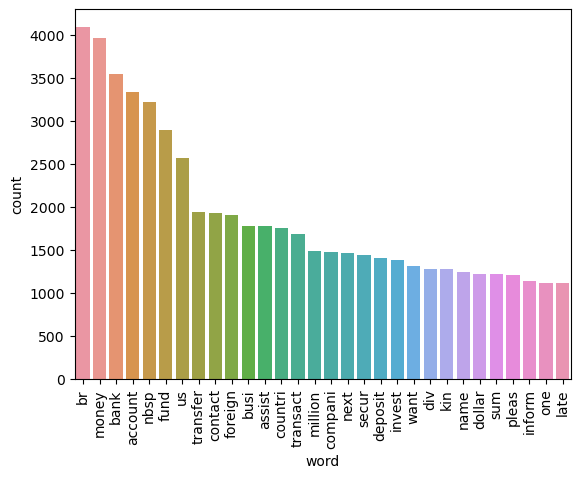

In [135]:
most_common_words = pd.DataFrame(Counter(ds1_spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x = 'word', y = 'count', data = most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

<p>Also, repeat the same steps for ham messages to make a ham_corpus as well</p>

In [137]:
ds1_ham_corpus = []

for msg in ds1[ds1['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ds1_ham_corpus.append(word)

len(ds1_ham_corpus)

103654

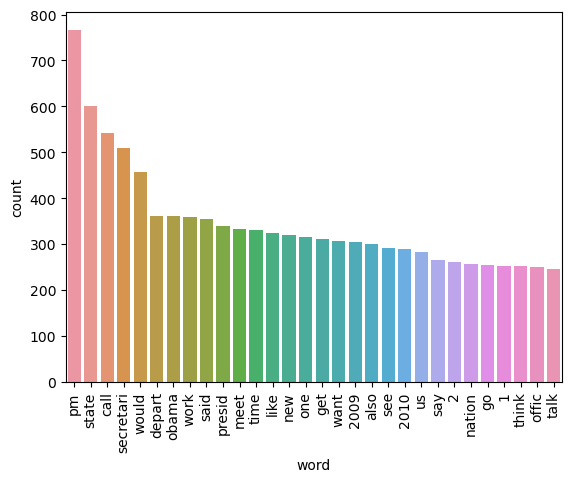

In [138]:
most_common_words = pd.DataFrame(Counter(ds1_ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

<p>Repeat these procedures for the other datasets</p>

<h4>Dataset 2</h4>

In [141]:
ds2['transformed_text'] = ds2['text'].apply(transform_text)
ds2.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

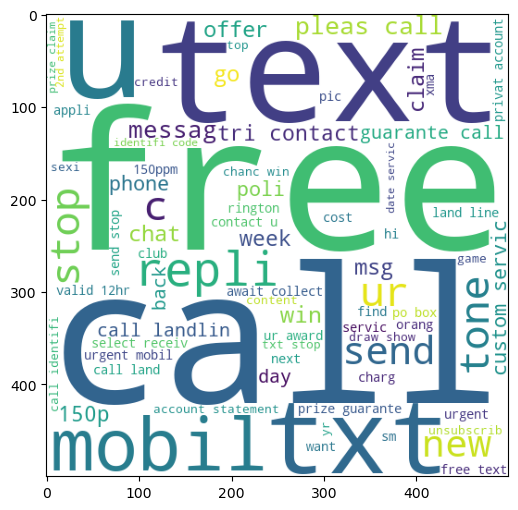

In [142]:
spam_wc = wc.generate(ds2[ds2['target'] == 1]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

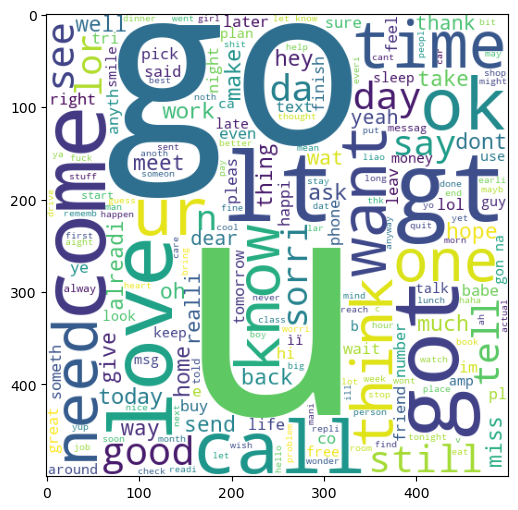

In [143]:
ham_wc = wc.generate(ds2[ds2['target'] == 0]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [144]:
ds2.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [145]:
ds2_spam_corpus = []

for msg in ds2[ds2['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ds2_spam_corpus.append(word)

len(ds2_spam_corpus)

9939

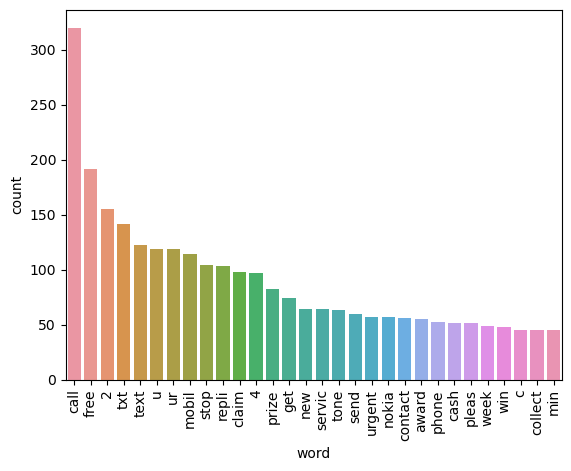

In [146]:
most_common_words = pd.DataFrame(Counter(ds2_spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x = 'word', y = 'count', data = most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

In [147]:
ds2_ham_corpus = []

for msg in ds2[ds2['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ds2_ham_corpus.append(word)

len(ds2_ham_corpus)

35404

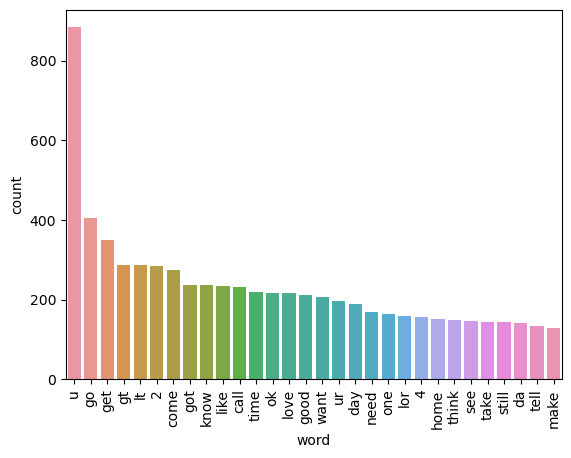

In [148]:
most_common_words = pd.DataFrame(Counter(ds2_ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

<h4>Dataset 3</h4>

In [150]:
ds3['transformed_text'] = ds3['text'].apply(transform_text)
ds3.head()

target                                               text  num_characters  \
0       0  me spam is the tool for dissident news since t...             902   
1       0  escapenumber escapenumber escapenumber penguin...           16688   
2       0  on wednesday escapenumber july escapenumber es...            1709   
3       0   can't think of how i'd be running afoul of th...            2284   
4       0  forwarded by william knowles http www thesun c...            1554   

   num_words  num_sentences                                   transformed_text  
0        184              1  spam tool dissid news sinc fact unsolicit mean...  
1       2897              1  escapenumb escapenumb escapenumb penguinreport...  
2        320              1  wednesday escapenumb juli escapenumb escapenum...  
3        389              1  ca think run afoul spam filter post second tri...  
4        269              1  forward william knowl http www thesun co uk ar...

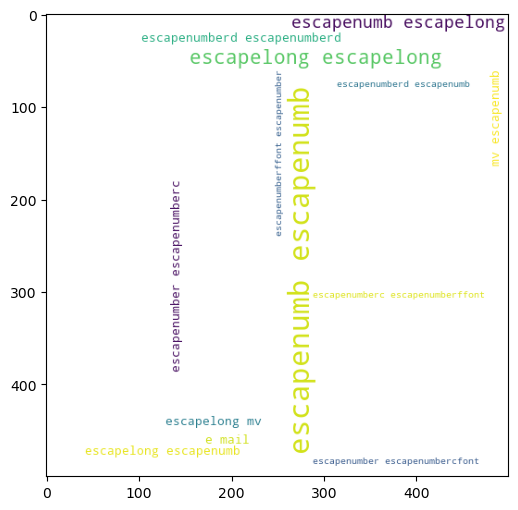

In [151]:
spam_wc = wc.generate(ds3[ds3['target'] == 1]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

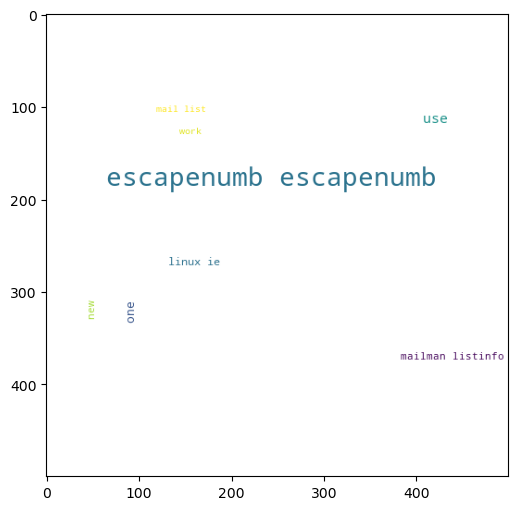

In [152]:
ham_wc = wc.generate(ds3[ds3['target'] == 0]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [153]:
ds3.head()

target                                               text  num_characters  \
0       0  me spam is the tool for dissident news since t...             902   
1       0  escapenumber escapenumber escapenumber penguin...           16688   
2       0  on wednesday escapenumber july escapenumber es...            1709   
3       0   can't think of how i'd be running afoul of th...            2284   
4       0  forwarded by william knowles http www thesun c...            1554   

   num_words  num_sentences                                   transformed_text  
0        184              1  spam tool dissid news sinc fact unsolicit mean...  
1       2897              1  escapenumb escapenumb escapenumb penguinreport...  
2        320              1  wednesday escapenumb juli escapenumb escapenum...  
3        389              1  ca think run afoul spam filter post second tri...  
4        269              1  forward william knowl http www thesun co uk ar...

In [154]:
ds3_spam_corpus = []

for msg in ds3[ds3['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ds3_spam_corpus.append(word)

len(ds3_spam_corpus)

375439

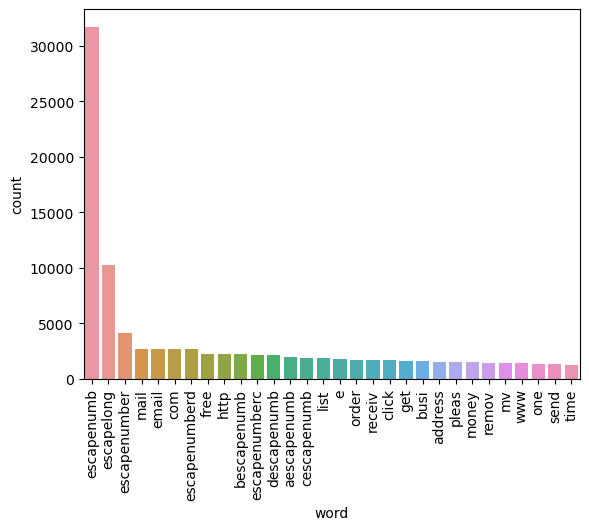

In [155]:
most_common_words = pd.DataFrame(Counter(ds3_spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x = 'word', y = 'count', data = most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

In [156]:
ds3_ham_corpus = []

for msg in ds3[ds3['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ds3_ham_corpus.append(word)

len(ds3_ham_corpus)

741044

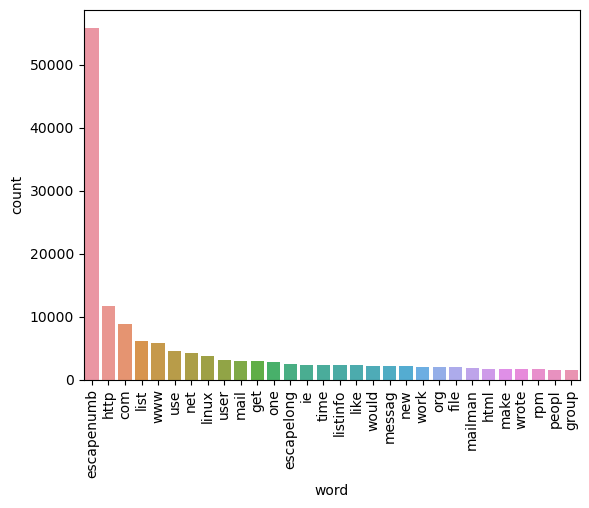

In [157]:
most_common_words = pd.DataFrame(Counter(ds3_ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

<h4>Dataset 4</h4>

In [159]:
ds4['transformed_text'] = ds4['text'].apply(transform_text)
ds4.head()

target                                               text  num_characters  \
0       0  wrong bill grace i ' ll forward original messa...            1679   
1       0  i have continued the hilcorp old ocean deal da...             661   
2       0  several related issues have resulted in an inc...            3767   
3       0  one year rate for this one will be escapenumbe...             688   
4       0  attached is the weekly deal report for escapen...             179   

   num_words  num_sentences                                   transformed_text  
0        261              1  wrong bill grace forward origin messag rodrigu...  
1        111              1  continu hilcorp old ocean deal dan hyvl write ...  
2        585              1  sever relat issu result increas level oper ris...  
3        110              1  one year rate one escapenumb mm volum greater ...  
4         22              1  attach weekli deal report escapenumb escapenum...

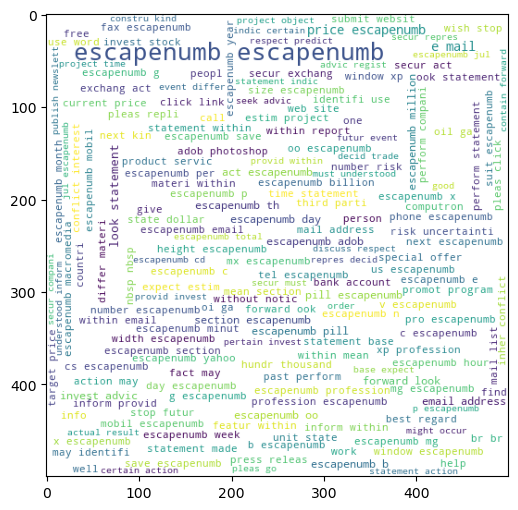

In [160]:
spam_wc = wc.generate(ds4[ds4['target'] == 1]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

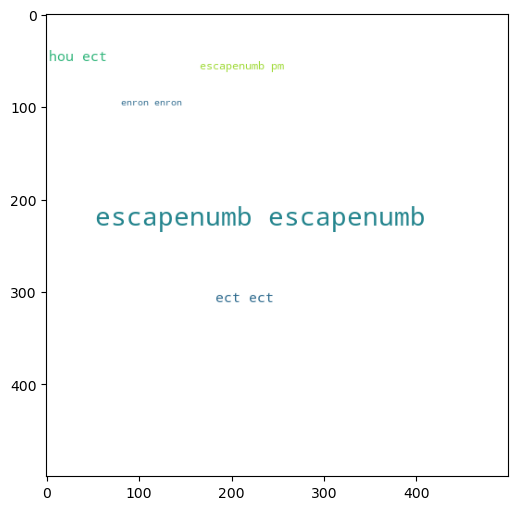

In [161]:
ham_wc = wc.generate(ds4[ds4['target'] == 0]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [162]:
ds4.head()

target                                               text  num_characters  \
0       0  wrong bill grace i ' ll forward original messa...            1679   
1       0  i have continued the hilcorp old ocean deal da...             661   
2       0  several related issues have resulted in an inc...            3767   
3       0  one year rate for this one will be escapenumbe...             688   
4       0  attached is the weekly deal report for escapen...             179   

   num_words  num_sentences                                   transformed_text  
0        261              1  wrong bill grace forward origin messag rodrigu...  
1        111              1  continu hilcorp old ocean deal dan hyvl write ...  
2        585              1  sever relat issu result increas level oper ris...  
3        110              1  one year rate one escapenumb mm volum greater ...  
4         22              1  attach weekli deal report escapenumb escapenum...

In [163]:
ds4_spam_corpus = []

for msg in ds4[ds4['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ds4_spam_corpus.append(word)

len(ds4_spam_corpus)

1878007

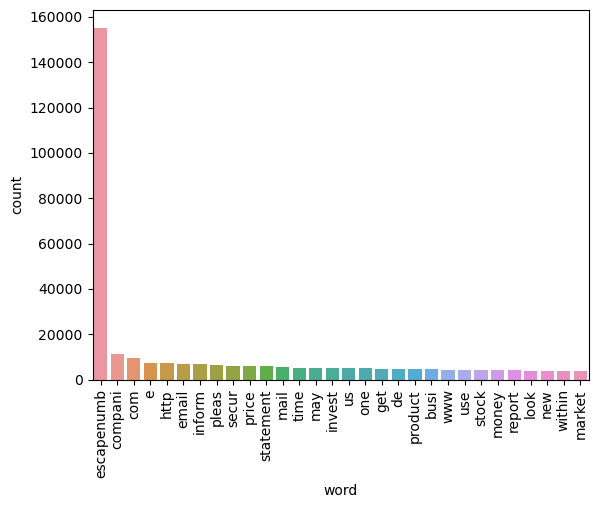

In [164]:
most_common_words = pd.DataFrame(Counter(ds4_spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x = 'word', y = 'count', data = most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

In [165]:
ds4_ham_corpus = []

for msg in ds4[ds4['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ds4_ham_corpus.append(word)

len(ds4_ham_corpus)

2520762

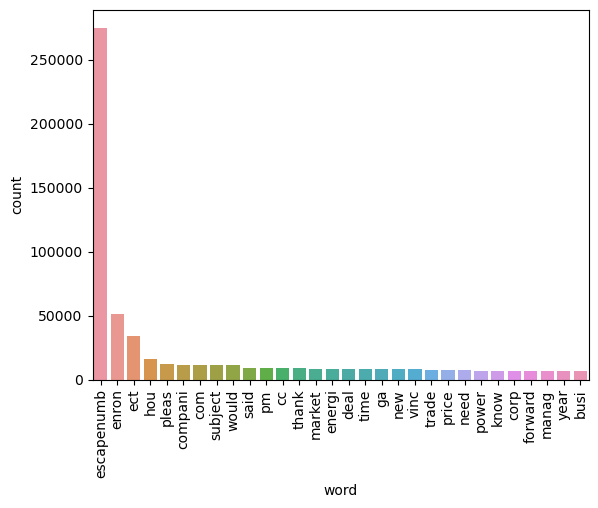

In [166]:
most_common_words = pd.DataFrame(Counter(ds4_ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

<h4>Dataset 5</h4>

In [168]:
ds5['transformed_text'] = ds5['text'].apply(transform_text)
ds5.head()

text  target  num_characters  \
0  content - length : 3386 apple-iss research cen...       0            2857   
1  lang classification grimes , joseph e . and ba...       0            1801   
2  i am posting this inquiry for sergei atamas ( ...       0            1436   
3  a colleague and i are researching the differin...       0             325   
4  earlier this morning i was on the phone with a...       0            1045   

   num_words  num_sentences                                   transformed_text  
0        584             22  content length 3386 research center us 10 mill...  
1        344             35  lang classif grime joseph e barbara f grime et...  
2        280             19  post inquiri sergei atama satama umabnet ab um...  
3         60              4  colleagu research differ degre risk perceiv ho...  
4        232             12  earlier morn phone friend mine live south amer...

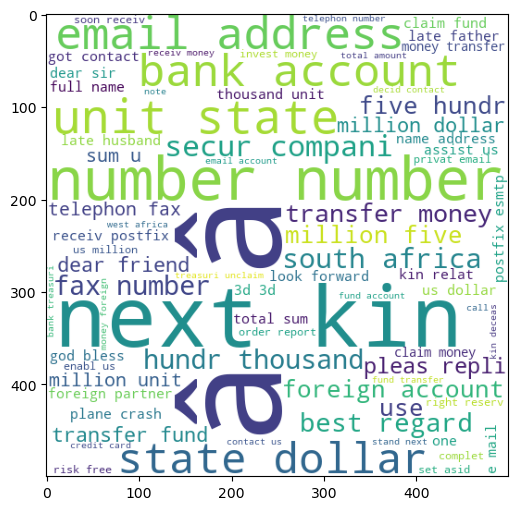

In [169]:
spam_wc = wc.generate(ds5[ds5['target'] == 1]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

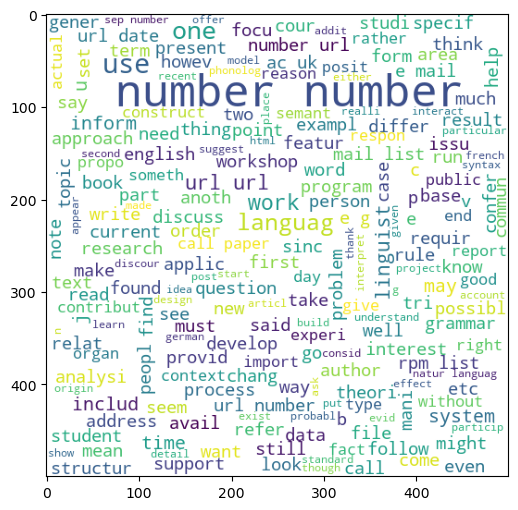

In [170]:
ham_wc = wc.generate(ds5[ds5['target'] == 0]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [171]:
ds5.head()

text  target  num_characters  \
0  content - length : 3386 apple-iss research cen...       0            2857   
1  lang classification grimes , joseph e . and ba...       0            1801   
2  i am posting this inquiry for sergei atamas ( ...       0            1436   
3  a colleague and i are researching the differin...       0             325   
4  earlier this morning i was on the phone with a...       0            1045   

   num_words  num_sentences                                   transformed_text  
0        584             22  content length 3386 research center us 10 mill...  
1        344             35  lang classif grime joseph e barbara f grime et...  
2        280             19  post inquiri sergei atama satama umabnet ab um...  
3         60              4  colleagu research differ degre risk perceiv ho...  
4        232             12  earlier morn phone friend mine live south amer...

In [172]:
ds5_spam_corpus = []

for msg in ds5[ds5['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ds5_spam_corpus.append(word)

len(ds5_spam_corpus)

1209897

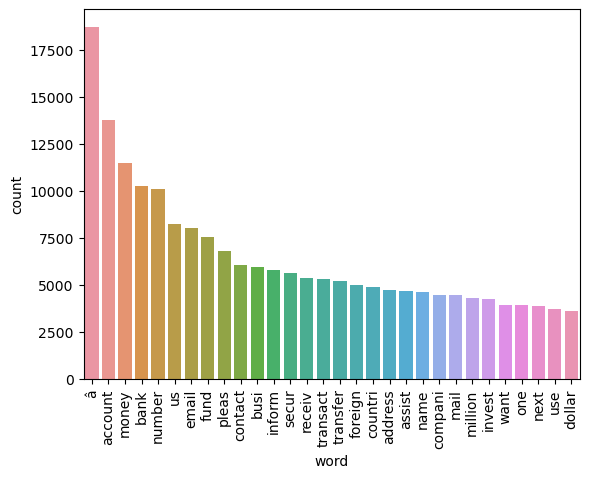

In [173]:
most_common_words = pd.DataFrame(Counter(ds5_spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x = 'word', y = 'count', data = most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

In [174]:
ds5_ham_corpus = []

for msg in ds5[ds5['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ds5_ham_corpus.append(word)

len(ds5_ham_corpus)

1008632

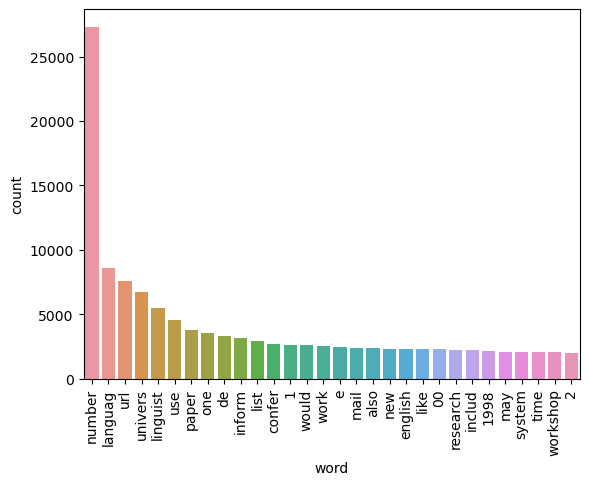

In [175]:
most_common_words = pd.DataFrame(Counter(ds5_ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation = 'vertical')
plt.show()

<h3>4. Model Implementation</h3>
<ul>
    <li>Begin by importing and initializing the feature extraction packages from the sklearn library. There are two to be compared; the CountVectorizer and the TfidfVectorizer.</li>
    <li>Then make a variable for the data to train the model with by fittng the transformed text from the data frame with the vectorizer.</li>
    <li>Also import the train_test_split package from the model_selection of the sklearn library. This helps to divide up the vectorize dataset into training and testing sets. It is usually adviced to split in a 80-20 or 70-30 ratio, the larger set being the training set</li>
</ul>

In [177]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 6000)

<p>We can prepare the vectorized format for the datasets and then obtain the train test split versions as well</p>

<h4>Dataset 1</h4>

In [180]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X1 = tfidf.fit_transform(ds1['transformed_text']).toarray()

X1.shape

(4339, 6000)

In [181]:
# We can initialize the MinMaxScaler package from the sklean.processing library and use this to fit the X data. It works better than the \standard Scaler package This helps in scaling which improves the overall performance of the Algorithms

# from sklearn.preprocessing import MinMaxScalar

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [182]:
# Make a variable for the data to predict with from the target column by directly using the values

y1 = ds1['target'].values
y1

array([1, 0, 1, ..., 0, 0, 0])

In [183]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 2)

<h4>Dataset 2</h4

In [185]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X2 = tfidf.fit_transform(ds2['transformed_text']).toarray()

X2.shape

(5169, 6000)

In [186]:
y2 = ds2['target'].values
y2

array([0, 0, 1, ..., 0, 0, 0])

In [187]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 2)

<h4>Dataset 3</h4

In [189]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X3 = tfidf.fit_transform(ds3['transformed_text']).toarray()

X3.shape

(5640, 6000)

In [190]:
y3 = ds3['target'].values
y3

array([0, 0, 0, ..., 1, 1, 1])

In [191]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 2)

<h4>Dataset 4</h4

In [193]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X4 = tfidf.fit_transform(ds4['transformed_text']).toarray()

X4.shape

(28063, 6000)

In [194]:
y4 = ds4['target'].values
y4

array([0, 0, 0, ..., 1, 1, 1])

In [195]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 2)

<h4>Dataset 5</h4

In [197]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X5 = tfidf.fit_transform(ds5['transformed_text']).toarray()

X5.shape

(10628, 6000)

In [198]:
y5 = ds5['target'].values
y5

array([0, 0, 0, ..., 1, 1, 1])

In [199]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.2, random_state = 2)

<h5>Train the Models with the train test sets</h5>
<p>We can proceed to import the models from the sklearn library and train them on the datasets and draw inferences from that</p>

In [201]:
# Import the Classifier from the sklearn library and the Naive bayes package and intialize them. Also import the evaluation metrics from the sklearn library

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, cohen_kappa_score, hamming_loss, jaccard_score, fbeta_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [202]:
gnb.fit(X1_train, y1_train)
y1_pred_gnb = gnb.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y1_pred_gnb))
print('Precision:', precision_score(y1_test, y1_pred_gnb))
print('Recall:', recall_score(y1_test, y1_pred_gnb))
print('F1:', f1_score(y1_test, y1_pred_gnb))
print('ROC_AUC:', roc_auc_score(y1_test, y1_pred_gnb))
print('Log_Loss:', log_loss(y1_test, y1_pred_gnb))
print('Hamming:', hamming_loss(y1_test, y1_pred_gnb))
print('Kappa:', cohen_kappa_score(y1_test, y1_pred_gnb))
print('F2:', fbeta_score(y1_test, y1_pred_gnb, beta=2))
print('Jaccard:', jaccard_score(y1_test, y1_pred_gnb))

Accuracy: 0.9585253456221198
Precision: 0.9479166666666666
Recall: 0.9578947368421052
F1: 0.9528795811518325
ROC_AUC: 0.958455565142364
Log_Loss: 1.4948980668297436
Hamming: 0.041474654377880185
Kappa: 0.9158443573059852
F2: 0.9558823529411765
Jaccard: 0.91


In [203]:
mnb.fit(X1_train, y1_train)
y1_pred_mnb = mnb.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y1_pred_mnb))
print('Precision:', precision_score(y1_test, y1_pred_mnb))
print('Recall:', recall_score(y1_test, y1_pred_mnb))
print('F1:', f1_score(y1_test, y1_pred_mnb))
print('ROC_AUC:', roc_auc_score(y1_test, y1_pred_mnb))
print('Log_Loss:', log_loss(y1_test, y1_pred_mnb))
print('Hamming:', hamming_loss(y1_test, y1_pred_mnb))
print('Kappa:', cohen_kappa_score(y1_test, y1_pred_mnb))
print('F2:', fbeta_score(y1_test, y1_pred_mnb, beta=2))
print('Jaccard:', jaccard_score(y1_test, y1_pred_mnb))

Accuracy: 0.9585253456221198
Precision: 0.9479166666666666
Recall: 0.9578947368421052
F1: 0.9528795811518325
ROC_AUC: 0.958455565142364
Log_Loss: 1.4948980668297436
Hamming: 0.041474654377880185
Kappa: 0.9158443573059852
F2: 0.9558823529411765
Jaccard: 0.91


In [204]:
bnb.fit(X1_train, y1_train)
y1_pred_bnb = bnb.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y1_pred_bnb))
print('Precision:', precision_score(y1_test, y1_pred_bnb))
print('Recall:', recall_score(y1_test, y1_pred_bnb))
print('F1:', f1_score(y1_test, y1_pred_bnb))
print('ROC_AUC:', roc_auc_score(y1_test, y1_pred_bnb))
print('Log_Loss:', log_loss(y1_test, y1_pred_bnb))
print('Hamming:', hamming_loss(y1_test, y1_pred_bnb))
print('Kappa:', cohen_kappa_score(y1_test, y1_pred_bnb))
print('F2:', fbeta_score(y1_test, y1_pred_bnb, beta=2))
print('Jaccard:', jaccard_score(y1_test, y1_pred_bnb))

Accuracy: 0.9112903225806451
Precision: 0.9391304347826087
Recall: 0.8526315789473684
F1: 0.8937931034482759
ROC_AUC: 0.9047993960310612
Log_Loss: 3.1974208651636187
Hamming: 0.08870967741935484
Kappa: 0.8179351675292836
F2: 0.868632707774799
Jaccard: 0.8079800498753117


<h4>Dataset 2</h4>

In [206]:
gnb.fit(X2_train, y2_train)
y2_pred_gnb = gnb.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y2_pred_gnb))
print('Precision:', precision_score(y2_test, y2_pred_gnb))
print('Recall:', recall_score(y2_test, y2_pred_gnb))
print('F1:', f1_score(y2_test, y2_pred_gnb))
print('ROC_AUC:', roc_auc_score(y2_test, y2_pred_gnb))
print('Log_Loss:', log_loss(y2_test, y2_pred_gnb))
print('Hamming:', hamming_loss(y2_test, y2_pred_gnb))
print('Kappa:', cohen_kappa_score(y2_test, y2_pred_gnb))
print('F2:', fbeta_score(y2_test, y2_pred_gnb, beta=2))
print('Jaccard:', jaccard_score(y2_test, y2_pred_gnb))

Accuracy: 0.8762088974854932
Precision: 0.5231481481481481
Recall: 0.8188405797101449
F1: 0.6384180790960452
ROC_AUC: 0.851942611283644
Log_Loss: 4.461883591689551
Hamming: 0.12379110251450677
Kappa: 0.5680699693231512
F2: 0.7356770833333334
Jaccard: 0.46887966804979253


In [207]:
mnb.fit(X2_train, y2_train)
y2_pred_mnb = mnb.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y2_pred_mnb))
print('Precision:', precision_score(y2_test, y2_pred_mnb))
print('Recall:', recall_score(y2_test, y2_pred_mnb))
print('F1:', f1_score(y2_test, y2_pred_mnb))
print('ROC_AUC:', roc_auc_score(y2_test, y2_pred_mnb))
print('Log_Loss:', log_loss(y2_test, y2_pred_mnb))
print('Hamming:', hamming_loss(y2_test, y2_pred_mnb))
print('Kappa:', cohen_kappa_score(y2_test, y2_pred_mnb))
print('F2:', fbeta_score(y2_test, y2_pred_mnb, beta=2))
print('Jaccard:', jaccard_score(y2_test, y2_pred_mnb))

Accuracy: 0.9593810444874274
Precision: 1.0
Recall: 0.6956521739130435
F1: 0.8205128205128205
ROC_AUC: 0.8478260869565217
Log_Loss: 1.4640555535231339
Hamming: 0.04061895551257253
Kappa: 0.7984405458089668
F2: 0.7407407407407407
Jaccard: 0.6956521739130435


In [208]:
bnb.fit(X2_train, y2_train)
y2_pred_bnb = bnb.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y2_pred_bnb))
print('Precision:', precision_score(y2_test, y2_pred_bnb))
print('Recall:', recall_score(y2_test, y2_pred_bnb))
print('F1:', f1_score(y2_test, y2_pred_bnb))
print('ROC_AUC:', roc_auc_score(y2_test, y2_pred_bnb))
print('Log_Loss:', log_loss(y2_test, y2_pred_bnb))
print('Hamming:', hamming_loss(y2_test, y2_pred_bnb))
print('Kappa:', cohen_kappa_score(y2_test, y2_pred_bnb))
print('F2:', fbeta_score(y2_test, y2_pred_bnb, beta=2))
print('Jaccard:', jaccard_score(y2_test, y2_pred_bnb))

Accuracy: 0.9738878143133463
Precision: 0.9663865546218487
Recall: 0.8333333333333334
F1: 0.8949416342412452
ROC_AUC: 0.914434523809524
Log_Loss: 0.9411785701220147
Hamming: 0.02611218568665377
Kappa: 0.8801257224316642
F2: 0.856929955290611
Jaccard: 0.8098591549295775


<h5>Observation:</h5>
<p>On testing datasets 1 and 2 with the three variations of the Naive Bayes Algorithm, it is observed that the Multinomial Naive Bayes edges out in most of the metrics hence, it would be considered for the Naive Bayes Algorithm in subsequent sections.</p>

<h4>Import the Models</h4>
<p>We then import the models and initialize them using hyperparameters where necessary and then</p>

In [211]:
# Import the models to be compared or combined

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

knc = KNeighborsClassifier()
svc = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)
mnb = MultinomialNB(alpha=1.0, fit_prior=True)
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='lbfgs', random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

<p>It is also good practice to package these initialized models into a dictionary for easy access and use</p>

In [213]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

<h3>Model Evaluation</h3>
<ul>
    <li>Define a function that takes the model and the training and testing sets as arguments and returns the evaluation metrics</li>
    <li>Loop over the models using their names and print the metrics for each dataset</li>
</ul>

In [215]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division = 0)
    recall = recall_score(y_test, y_pred, zero_division = 0)
    f1 = f1_score(y_test, y_pred, zero_division = 0)
    roc = roc_auc_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    jaccard = jaccard_score(y_test, y_pred)
    log = log_loss(y_test, y_pred)

    return accuracy, precision, recall, f1, roc, log, hamming, kappa, f2, jaccard

<h5>Test -  SVC Classifier</h5>
<p>As a  the SVC model on the first dataset to see its the function in action</p> 

In [217]:
train_classifier(etc, X2_train, y2_train, X2_test, y2_test)

(0.97678916827853,
 0.975,
 0.8478260869565217,
 0.9069767441860465,
 0.9222389363354037,
 0.8366031734417909,
 0.02321083172147002,
 0.8937907657541986,
 0.8705357142857143,
 0.8297872340425532)

<h4>Dataset 1</h4>

In [219]:
accuracy_scores1 = []
precision_scores1 = []
recall_scores1 = []
f1_scores1 = []
roc_scores1 = []
log_scores1 = []
hamming_scores1 = []
kappa_scores1 = []
f2_scores1 = []
jaccard_scores1 = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1, current_roc, current_log, current_hamming, current_kappa, current_f2, current_jaccard = train_classifier(clf, X1_train, y1_train, X1_test, y1_test)


    print('For ', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_precision)
    print('Recall: ', current_recall)
    print('F1: ', current_f1)
    print('ROC_AUC: ', current_roc)
    print('Log: ', current_log)
    print('Hamming: ', current_hamming)
    print('Kappa: ', current_kappa)
    print('F2: ', current_f2)
    print('Jaccard: ', current_jaccard)
    print('\n')

    accuracy_scores1.append(current_accuracy)
    precision_scores1.append(current_precision)
    recall_scores1.append(current_recall)
    f1_scores1.append(current_f1)
    roc_scores1.append(current_roc)
    log_scores1.append(current_log)
    hamming_scores1.append(current_hamming)
    kappa_scores1.append(current_kappa)
    f2_scores1.append(current_f2)
    jaccard_scores1.append(current_jaccard)

For  SVC
Accuracy:  0.9769585253456221
Precision:  0.9972375690607734
Recall:  0.95
F1:  0.9730458221024259
ROC_AUC:  0.9739754098360656
Log:  0.8304989260165244
Hamming:  0.02304147465437788
Kappa:  0.9529457683717502
F2:  0.9590860786397449
Jaccard:  0.94750656167979


For  KN
Accuracy:  0.5506912442396313
Precision:  0.4935064935064935
Recall:  1.0
F1:  0.6608695652173913
ROC_AUC:  0.6004098360655737
Log:  16.19472905732222
Hamming:  0.44930875576036866
Kappa:  0.1803389830508474
F2:  0.8296943231441049
Jaccard:  0.4935064935064935


For  NB
Accuracy:  0.9585253456221198
Precision:  0.9479166666666666
Recall:  0.9578947368421052
F1:  0.9528795811518325
ROC_AUC:  0.958455565142364
Log:  1.4948980668297436
Hamming:  0.041474654377880185
Kappa:  0.9158443573059852
F2:  0.9558823529411765
Jaccard:  0.91


For  DT
Accuracy:  0.9377880184331797
Precision:  0.9657142857142857
Recall:  0.8894736842105263
F1:  0.9260273972602739
ROC_AUC:  0.93244176013805
Log:  2.242347100244616
Hamming:  0.

<h4>Dataset 2</h4>

In [221]:
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []
f1_scores2 = []
roc_scores2 = []
log_scores2 = []
hamming_scores2 = []
kappa_scores2 = []
f2_scores2 = []
jaccard_scores2 = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1, current_roc, current_log, current_hamming, current_kappa, current_f2, current_jaccard = train_classifier(clf, X2_train, y2_train, X2_test, y2_test)


    print('For ', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_precision)
    print('Recall: ', current_recall)
    print('F1: ', current_f1)
    print('ROC_AUC: ', current_roc)
    print('Log: ', current_log)
    print('Hamming: ', current_hamming)
    print('Kappa: ', current_kappa)
    print('F2: ', current_f2)
    print('Jaccard: ', current_jaccard)
    print('\n')

    accuracy_scores2.append(current_accuracy)
    precision_scores2.append(current_precision)
    recall_scores2.append(current_recall)
    f1_scores2.append(current_f1)
    roc_scores2.append(current_roc)
    log_scores2.append(current_log)
    hamming_scores2.append(current_hamming)
    kappa_scores2.append(current_kappa)
    f2_scores2.append(current_f2)
    jaccard_scores2.append(current_jaccard)

For  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
Recall:  0.8405797101449275
F1:  0.9027237354085603
ROC_AUC:  0.9186157479296067
Log:  0.8714616390018656
Hamming:  0.024177949709864602
Kappa:  0.8890052985478372
F2:  0.8643815201192251
Jaccard:  0.8226950354609929


For  KN
Accuracy:  0.902321083172147
Precision:  1.0
Recall:  0.26811594202898553
F1:  0.4228571428571429
ROC_AUC:  0.6340579710144928
Log:  3.520705021567536
Hamming:  0.097678916827853
Kappa:  0.3883376869823941
F2:  0.3140916808149406
Jaccard:  0.26811594202898553


For  NB
Accuracy:  0.9593810444874274
Precision:  1.0
Recall:  0.6956521739130435
F1:  0.8205128205128205
ROC_AUC:  0.8478260869565217
Log:  1.4640555535231339
Hamming:  0.04061895551257253
Kappa:  0.7984405458089668
F2:  0.7407407407407407
Jaccard:  0.6956521739130435


For  DT
Accuracy:  0.9352030947775629
Precision:  0.8380952380952381
Recall:  0.6376811594202898
F1:  0.7242798353909465
ROC_AUC:  0.8093539725672878
Log:  2.33551719252

<h4>Dataset 3</h4>

In [223]:
accuracy_scores3 = []
precision_scores3 = []
recall_scores3 = []
f1_scores3 = []
roc_scores3 = []
log_scores3 = []
hamming_scores3 = []
kappa_scores3 = []
f2_scores3 = []
jaccard_scores3 = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1, current_roc, current_log, current_hamming, current_kappa, current_f2, current_jaccard = train_classifier(clf, X3_train, y3_train, X3_test, y3_test)


    print('For ', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_precision)
    print('Recall: ', current_recall)
    print('F1: ', current_f1)
    print('ROC_AUC: ', current_roc)
    print('Log: ', current_log)
    print('Hamming: ', current_hamming)
    print('Kappa: ', current_kappa)
    print('F2: ', current_f2)
    print('Jaccard: ', current_jaccard)
    print('\n')

    accuracy_scores3.append(current_accuracy)
    precision_scores3.append(current_precision)
    recall_scores3.append(current_recall)
    f1_scores3.append(current_f1)
    roc_scores3.append(current_roc)
    log_scores3.append(current_log)
    hamming_scores3.append(current_hamming)
    kappa_scores3.append(current_kappa)
    f2_scores3.append(current_f2)
    jaccard_scores3.append(current_jaccard)

For  SVC
Accuracy:  0.9787234042553191
Precision:  0.978125
Recall:  0.9484848484848485
F1:  0.963076923076923
ROC_AUC:  0.9698564593301435
Log:  0.7668862423216417
Hamming:  0.02127659574468085
Kappa:  0.9481379310344827
F2:  0.9542682926829268
Jaccard:  0.9287833827893175


For  KN
Accuracy:  0.9326241134751773
Precision:  0.8324607329842932
Recall:  0.9636363636363636
F1:  0.8932584269662921
ROC_AUC:  0.9417179311916154
Log:  2.4284731006851987
Hamming:  0.0673758865248227
Kappa:  0.8444183109020428
F2:  0.9341950646298472
Jaccard:  0.8071065989847716


For  NB
Accuracy:  0.9583333333333334
Precision:  0.9639344262295082
Recall:  0.8909090909090909
F1:  0.925984251968504
ROC_AUC:  0.9385623148781044
Log:  1.5018188912132149
Hamming:  0.041666666666666664
Kappa:  0.8970523127111732
F2:  0.9046153846153846
Jaccard:  0.8621700879765396


For  DT
Accuracy:  0.8909574468085106
Precision:  0.8631578947368421
Recall:  0.7454545454545455
F1:  0.8
ROC_AUC:  0.8482911825017089
Log:  3.9302919

<h4>Dataset 4</h4>

In [225]:
accuracy_scores4 = []
precision_scores4 = []
recall_scores4 = []
f1_scores4 = []
roc_scores4 = []
log_scores4 = []
hamming_scores4 = []
kappa_scores4 = []
f2_scores4 = []
jaccard_scores4 = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1, current_roc, current_log, current_hamming, current_kappa, current_f2, current_jaccard = train_classifier(clf, X4_train, y4_train, X4_test, y4_test)


    print('For ', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_precision)
    print('Recall: ', current_recall)
    print('F1: ', current_f1)
    print('ROC_AUC: ', current_roc)
    print('Log: ', current_log)
    print('Hamming: ', current_hamming)
    print('Kappa: ', current_kappa)
    print('F2: ', current_f2)
    print('Jaccard: ', current_jaccard)
    print('\n')

    accuracy_scores4.append(current_accuracy)
    precision_scores4.append(current_precision)
    recall_scores4.append(current_recall)
    f1_scores4.append(current_f1)
    roc_scores4.append(current_roc)
    log_scores4.append(current_log)
    hamming_scores4.append(current_hamming)
    kappa_scores4.append(current_kappa)
    f2_scores4.append(current_f2)
    jaccard_scores4.append(current_jaccard)

For  SVC
Accuracy:  0.9848565829324781
Precision:  0.9783939503060857
Recall:  0.9908825674690007
F1:  0.9845986591773872
ROC_AUC:  0.984991962940352
Log:  0.5458240759085977
Hamming:  0.015143417067521824
Kappa:  0.9697058475609908
F2:  0.9883594034194253
Jaccard:  0.9696645253390436


For  KN
Accuracy:  0.7069303402814894
Precision:  0.625947187141217
Recall:  0.9941648431801605
F1:  0.7682119205298014
ROC_AUC:  0.7133833620289518
Log:  10.563301233760505
Hamming:  0.2930696597185106
Kappa:  0.421200226344967
F2:  0.8895124975526986
Jaccard:  0.6236559139784946


For  NB
Accuracy:  0.980224478888295
Precision:  0.9823982398239824
Recall:  0.9770240700218819
F1:  0.9797037849698299
ROC_AUC:  0.9801525783756221
Log:  0.7127820285394629
Hamming:  0.01977552111170497
Kappa:  0.9604231923397293
F2:  0.9780941949616648
Jaccard:  0.9602150537634409


For  DT
Accuracy:  0.8457153037591306
Precision:  0.7655719139297849
Recall:  0.9861415025528811
F1:  0.8619700350653491
ROC_AUC:  0.848870124

<h4>Dataset 5</h4>

In [227]:
accuracy_scores5 = []
precision_scores5 = []
recall_scores5 = []
f1_scores5 = []
roc_scores5 = []
log_scores5 = []
hamming_scores5 = []
kappa_scores5 = []
f2_scores5 = []
jaccard_scores5 = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1, current_roc, current_log, current_hamming, current_kappa, current_f2, current_jaccard = train_classifier(clf, X5_train, y5_train, X5_test, y5_test)


    print('For ', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_precision)
    print('Recall: ', current_recall)
    print('F1: ', current_f1)
    print('ROC_AUC: ', current_roc)
    print('Log: ', current_log)
    print('Hamming: ', current_hamming)
    print('Kappa: ', current_kappa)
    print('F2: ', current_f2)
    print('Jaccard: ', current_jaccard)
    print('\n')

    accuracy_scores5.append(current_accuracy)
    precision_scores5.append(current_precision)
    recall_scores5.append(current_recall)
    f1_scores5.append(current_f1)
    roc_scores5.append(current_roc)
    log_scores5.append(current_log)
    hamming_scores5.append(current_hamming)
    kappa_scores5.append(current_kappa)
    f2_scores5.append(current_f2)
    jaccard_scores5.append(current_jaccard)

For  SVC
Accuracy:  0.9863593603010348
Precision:  0.9930191972076788
Recall:  0.9818809318377912
F1:  0.9874186550976138
ROC_AUC:  0.9868039612653279
Log:  0.49165848931533296
Hamming:  0.013640639698965193
Kappa:  0.9725249799242603
F2:  0.9840885506745071
Jaccard:  0.9751499571550986


For  KN
Accuracy:  0.7046095954844779
Precision:  0.6502546689303905
Recall:  0.99137187230371
F1:  0.7853725222146275
ROC_AUC:  0.6761409516637475
Log:  10.646949354828585
Hamming:  0.2953904045155221
Kappa:  0.37163645947561386
F2:  0.8972356707793222
Jaccard:  0.646595385481148


For  NB
Accuracy:  0.980244590780809
Precision:  0.9938107869142352
Recall:  0.9698015530629853
F1:  0.9816593886462882
ROC_AUC:  0.9812813349596209
Log:  0.7120571224566891
Hamming:  0.01975540921919097
Kappa:  0.9602595952969493
F2:  0.9745101439223166
Jaccard:  0.9639794168096055


For  DT
Accuracy:  0.9045155221072436
Precision:  0.9751491053677932
Recall:  0.8464193270060397
F1:  0.9062355658198614
ROC_AUC:  0.9102830

<h4>Dataset 1 Evaluation</h4>

In [229]:
performance_ds1 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores1, 'Precision': precision_scores1, 'Recall': recall_scores1, 'F1': f1_scores1, 'ROC_AUC': roc_scores1, 'Log_Loss': log_scores1, 'Hamming': hamming_scores1, 'Kappa': kappa_scores1, 'F2': f2_scores1, 'Jaccard': jaccard_scores1})

In [230]:
performance_ds1

Algorithm  Accuracy  Precision    Recall        F1   ROC_AUC   Log_Loss  \
0       SVC  0.976959   0.997238  0.950000  0.973046  0.973975   0.830499   
1        KN  0.550691   0.493506  1.000000  0.660870  0.600410  16.194729   
2        NB  0.958525   0.947917  0.957895  0.952880  0.958456   1.494898   
3        DT  0.937788   0.965714  0.889474  0.926027  0.932442   2.242347   
4        LR  0.970046   0.997191  0.934211  0.964674  0.966081   1.079649   
5        RF  0.982719   0.997275  0.963158  0.979920  0.980554   0.622874   
6  AdaBoost  0.950461   0.985591  0.900000  0.940853  0.944877   1.785573   
7       ETC  0.973502   0.978552  0.960526  0.969456  0.972066   0.955074   
8      GBDT  0.964286   0.986072  0.931579  0.958051  0.960667   1.287273   
9       xgb  0.975806   0.986450  0.957895  0.971963  0.973824   0.872024   

    Hamming     Kappa        F2   Jaccard  
0  0.023041  0.952946  0.959086  0.947507  
1  0.449309  0.180339  0.829694  0.493506  
2  0.041475  0.915844  0.955882  0.910000  
3  0.062212  0.872506  0.903743  0.862245  
4  0.029954  0.938722  0.946162  0.931759  
5  0.017281  0.964761  0.969793  0.960630  
6  0.049539  0.898387  0.915908  0.888312  
7  0.026498  0.946061  0.964078  0.940722  
8  0.035714  0.927002  0.941990  0.919481  
9  0.024194  0.950694  0.963473  0.945455

In [231]:
performance_df1 = pd.melt(performance_ds1, id_vars = 'Algorithm')

In [232]:
performance_df1

Algorithm  variable     value
0        SVC  Accuracy  0.976959
1         KN  Accuracy  0.550691
2         NB  Accuracy  0.958525
3         DT  Accuracy  0.937788
4         LR  Accuracy  0.970046
..       ...       ...       ...
95        RF   Jaccard  0.960630
96  AdaBoost   Jaccard  0.888312
97       ETC   Jaccard  0.940722
98      GBDT   Jaccard  0.919481
99       xgb   Jaccard  0.945455

[100 rows x 3 columns]

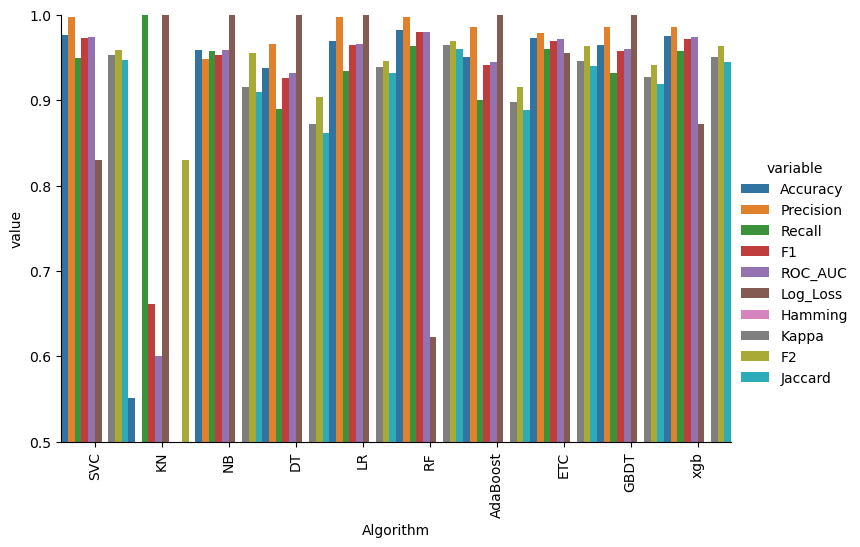

In [480]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5, width = 1.0, aspect = 1.5, dodge = True)

plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

<h4>Dataset 2 Evaluation</h4>

In [235]:
performance_ds2 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores2, 'Precision': precision_scores2, 'Recall': recall_scores2, 'F1': f1_scores2, 'ROC_AUC': roc_scores2, 'Log_Loss': log_scores2, 'Hamming': hamming_scores2, 'Kappa': kappa_scores2, 'F2': f2_scores2, 'Jaccard': jaccard_scores2})

In [236]:
performance_ds2

Algorithm  Accuracy  Precision    Recall        F1   ROC_AUC  Log_Loss  \
0       SVC  0.975822   0.974790  0.840580  0.902724  0.918616  0.871462   
1        KN  0.902321   1.000000  0.268116  0.422857  0.634058  3.520705   
2        NB  0.959381   1.000000  0.695652  0.820513  0.847826  1.464056   
3        DT  0.935203   0.838095  0.637681  0.724280  0.809354  2.335517   
4        LR  0.946809   0.988235  0.608696  0.753363  0.803790  1.917216   
5        RF  0.977756   1.000000  0.833333  0.909091  0.916667  0.801745   
6  AdaBoost  0.924565   0.840909  0.536232  0.654867  0.760303  2.718960   
7       ETC  0.976789   0.975000  0.847826  0.906977  0.922239  0.836603   
8      GBDT  0.951644   0.892857  0.724638  0.800000  0.855622  1.742923   
9       xgb  0.970019   0.934959  0.833333  0.881226  0.912202  1.080612   

    Hamming     Kappa        F2   Jaccard  
0  0.024178  0.889005  0.864382  0.822695  
1  0.097679  0.388338  0.314092  0.268116  
2  0.040619  0.798441  0.740741  0.695652  
3  0.064797  0.688333  0.669711  0.567742  
4  0.053191  0.725428  0.659341  0.604317  
5  0.022244  0.896538  0.862069  0.833333  
6  0.075435  0.614835  0.578125  0.486842  
7  0.023211  0.893791  0.870536  0.829787  
8  0.048356  0.772835  0.753012  0.666667  
9  0.029981  0.864135  0.851852  0.787671

In [237]:
performance_df2 = pd.melt(performance_ds2, id_vars = 'Algorithm')

In [238]:
performance_df2

Algorithm  variable     value
0        SVC  Accuracy  0.975822
1         KN  Accuracy  0.902321
2         NB  Accuracy  0.959381
3         DT  Accuracy  0.935203
4         LR  Accuracy  0.946809
..       ...       ...       ...
95        RF   Jaccard  0.833333
96  AdaBoost   Jaccard  0.486842
97       ETC   Jaccard  0.829787
98      GBDT   Jaccard  0.666667
99       xgb   Jaccard  0.787671

[100 rows x 3 columns]

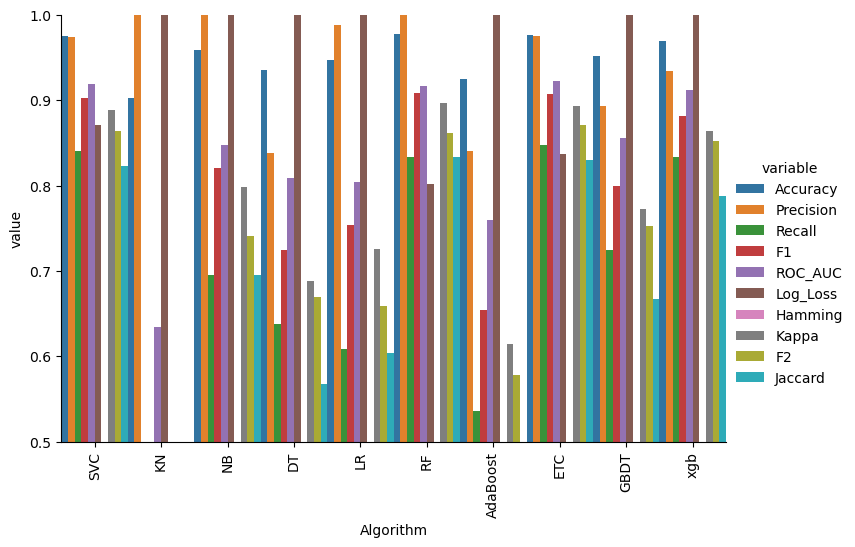

In [476]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df2, kind = 'bar', height = 5, width = 1.0, aspect = 1.5, dodge = True)

plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

<h4>Dataset 3 Evaluation</h4>

In [241]:
performance_ds3 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores3, 'Precision': precision_scores3, 'Recall': recall_scores3, 'F1': f1_scores3, 'ROC_AUC': roc_scores3, 'Log_Loss': log_scores3, 'Hamming': hamming_scores3, 'Kappa': kappa_scores3, 'F2': f2_scores3, 'Jaccard': jaccard_scores3})

In [242]:
performance_ds3

Algorithm  Accuracy  Precision    Recall        F1   ROC_AUC  Log_Loss  \
0       SVC  0.978723   0.978125  0.948485  0.963077  0.969856  0.766886   
1        KN  0.932624   0.832461  0.963636  0.893258  0.941718  2.428473   
2        NB  0.958333   0.963934  0.890909  0.925984  0.938562  1.501819   
3        DT  0.890957   0.863158  0.745455  0.800000  0.848291  3.930292   
4        LR  0.962766   0.976821  0.893939  0.933544  0.942584  1.342051   
5        RF  0.958333   0.957929  0.896970  0.926448  0.940339  1.501819   
6  AdaBoost  0.929078   0.908497  0.842424  0.874214  0.903668  2.556287   
7       ETC  0.966312   0.977124  0.906061  0.940252  0.948644  1.214237   
8      GBDT  0.936170   0.951049  0.824242  0.883117  0.903349  2.300659   
9       xgb  0.967199   0.953560  0.933333  0.943338  0.957268  1.182283   

    Hamming     Kappa        F2   Jaccard  
0  0.021277  0.948138  0.954268  0.928783  
1  0.067376  0.844418  0.934195  0.807107  
2  0.041667  0.897052  0.904615  0.862170  
3  0.109043  0.725596  0.766355  0.666667  
4  0.037234  0.907753  0.909371  0.875371  
5  0.041667  0.897425  0.908533  0.862974  
6  0.070922  0.824929  0.854859  0.776536  
7  0.033688  0.916841  0.919434  0.887240  
8  0.063830  0.839522  0.846824  0.790698  
9  0.032801  0.920260  0.937310  0.892754

In [243]:
performance_df3 = pd.melt(performance_ds3, id_vars = 'Algorithm')

In [244]:
performance_df3

Algorithm  variable     value
0        SVC  Accuracy  0.978723
1         KN  Accuracy  0.932624
2         NB  Accuracy  0.958333
3         DT  Accuracy  0.890957
4         LR  Accuracy  0.962766
..       ...       ...       ...
95        RF   Jaccard  0.862974
96  AdaBoost   Jaccard  0.776536
97       ETC   Jaccard  0.887240
98      GBDT   Jaccard  0.790698
99       xgb   Jaccard  0.892754

[100 rows x 3 columns]

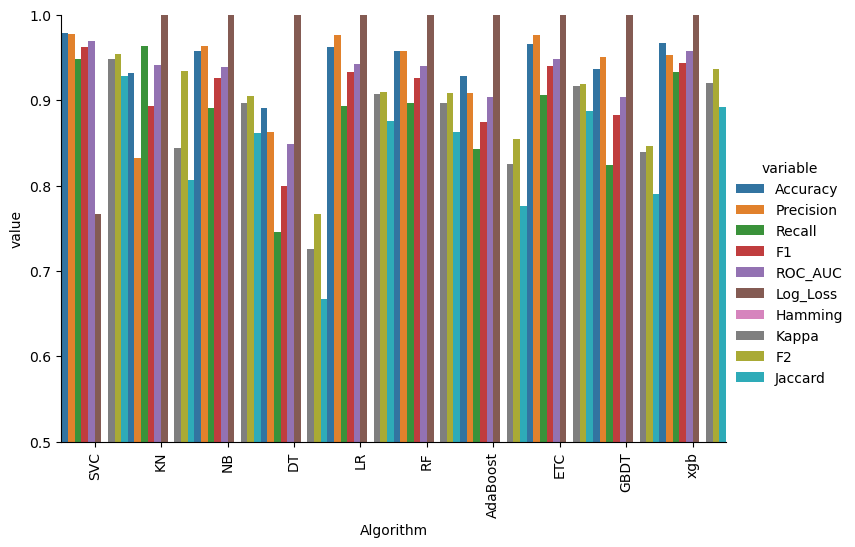

In [482]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df3, kind = 'bar', height = 5, width = 1.0, aspect = 1.5, dodge = True)

plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

<h4>Dataset 4 Evaluation</h4>

In [247]:
performance_ds4 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores4, 'Precision': precision_scores4, 'Recall': recall_scores4, 'F1': f1_scores4, 'ROC_AUC': roc_scores4, 'Log_Loss': log_scores4, 'Hamming': hamming_scores4, 'Kappa': kappa_scores4, 'F2': f2_scores4, 'Jaccard': jaccard_scores4})

In [248]:
performance_ds4

Algorithm  Accuracy  Precision    Recall        F1   ROC_AUC   Log_Loss  \
0       SVC  0.984857   0.978394  0.990883  0.984599  0.984992   0.545824   
1        KN  0.706930   0.625947  0.994165  0.768212  0.713383  10.563301   
2        NB  0.980224   0.982398  0.977024  0.979704  0.980153   0.712782   
3        DT  0.845715   0.765572  0.986142  0.861970  0.848870   5.560984   
4        LR  0.985926   0.977069  0.994530  0.985722  0.986119   0.507295   
5        RF  0.978265   0.976364  0.979212  0.977786  0.978286   0.783418   
6  AdaBoost  0.895778   0.851189  0.953319  0.899363  0.897070   3.756554   
7       ETC  0.982006   0.984587  0.978483  0.981526  0.981927   0.648567   
8      GBDT  0.921076   0.874308  0.979212  0.923792  0.922382   2.844707   
9       xgb  0.967397   0.946285  0.989424  0.967374  0.967892   1.175127   

    Hamming     Kappa        F2   Jaccard  
0  0.015143  0.969706  0.988359  0.969665  
1  0.293070  0.421200  0.889512  0.623656  
2  0.019776  0.960423  0.978094  0.960215  
3  0.154285  0.693253  0.932414  0.757423  
4  0.014074  0.971847  0.990988  0.971846  
5  0.021735  0.956509  0.978641  0.956537  
6  0.104222  0.792006  0.930978  0.817130  
7  0.017994  0.963988  0.979698  0.963721  
8  0.078924  0.842493  0.956265  0.858376  
9  0.032603  0.934827  0.980484  0.936809

In [249]:
performance_df4 = pd.melt(performance_ds4, id_vars = 'Algorithm')

In [250]:
performance_df4

Algorithm  variable     value
0        SVC  Accuracy  0.984857
1         KN  Accuracy  0.706930
2         NB  Accuracy  0.980224
3         DT  Accuracy  0.845715
4         LR  Accuracy  0.985926
..       ...       ...       ...
95        RF   Jaccard  0.956537
96  AdaBoost   Jaccard  0.817130
97       ETC   Jaccard  0.963721
98      GBDT   Jaccard  0.858376
99       xgb   Jaccard  0.936809

[100 rows x 3 columns]

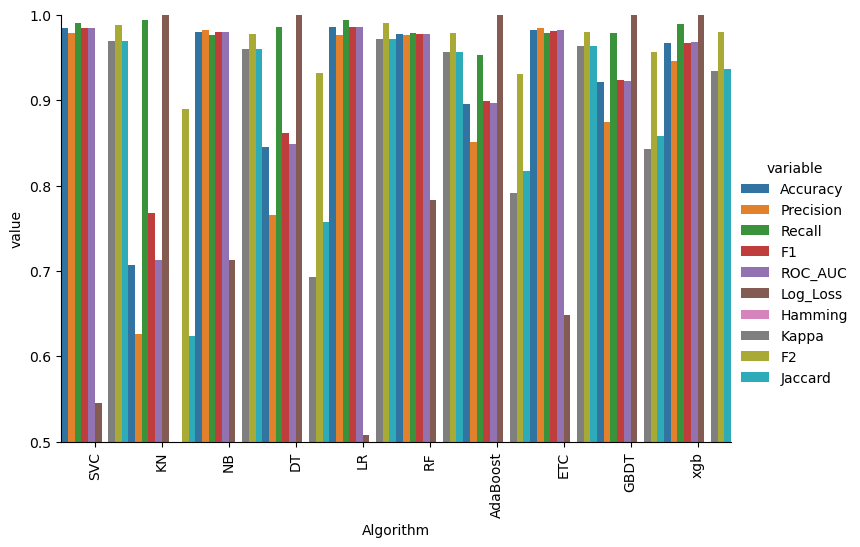

In [486]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df4, kind = 'bar', height = 5, width = 1.0, aspect = 1.5, dodge = True)

plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

<h4>Dataset 5 Evaluation</h4>

In [253]:
performance_ds5 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores5, 'Precision': precision_scores5, 'Recall': recall_scores5, 'F1': f1_scores5, 'ROC_AUC': roc_scores5, 'Log_Loss': log_scores5, 'Hamming': hamming_scores5, 'Kappa': kappa_scores5, 'F2': f2_scores5, 'Jaccard': jaccard_scores5})

In [254]:
performance_ds5

Algorithm  Accuracy  Precision    Recall        F1   ROC_AUC   Log_Loss  \
0       SVC  0.986359   0.993019  0.981881  0.987419  0.986804   0.491658   
1        KN  0.704610   0.650255  0.991372  0.785373  0.676141  10.646949   
2        NB  0.980245   0.993811  0.969802  0.981659  0.981281   0.712057   
3        DT  0.904516   0.975149  0.846419  0.906236  0.910283   3.441609   
4        LR  0.983537   0.994718  0.974978  0.984749  0.984387   0.593381   
5        RF  0.983067   0.983635  0.985332  0.984483  0.982842   0.610335   
6  AdaBoost  0.961430   0.976127  0.952545  0.964192  0.962312   1.390207   
7       ETC  0.987300   0.990468  0.986195  0.988327  0.987410   0.457751   
8      GBDT  0.967074   0.976378  0.962899  0.969592  0.967489   1.186762   
9       xgb  0.981656   0.981928  0.984469  0.983197  0.981376   0.661196   

    Hamming     Kappa        F2   Jaccard  
0  0.013641  0.972525  0.984089  0.975150  
1  0.295390  0.371636  0.897236  0.646595  
2  0.019755  0.960260  0.974510  0.963979  
3  0.095484  0.809951  0.869373  0.828547  
4  0.016463  0.966869  0.978863  0.969957  
5  0.016933  0.965849  0.984992  0.969440  
6  0.038570  0.922412  0.957170  0.930860  
7  0.012700  0.974402  0.987047  0.976923  
8  0.032926  0.933698  0.965565  0.940978  
9  0.018344  0.963000  0.983960  0.966949

In [255]:
performance_df5 = pd.melt(performance_ds5, id_vars = 'Algorithm')

In [256]:
performance_df5

Algorithm  variable     value
0        SVC  Accuracy  0.986359
1         KN  Accuracy  0.704610
2         NB  Accuracy  0.980245
3         DT  Accuracy  0.904516
4         LR  Accuracy  0.983537
..       ...       ...       ...
95        RF   Jaccard  0.969440
96  AdaBoost   Jaccard  0.930860
97       ETC   Jaccard  0.976923
98      GBDT   Jaccard  0.940978
99       xgb   Jaccard  0.966949

[100 rows x 3 columns]

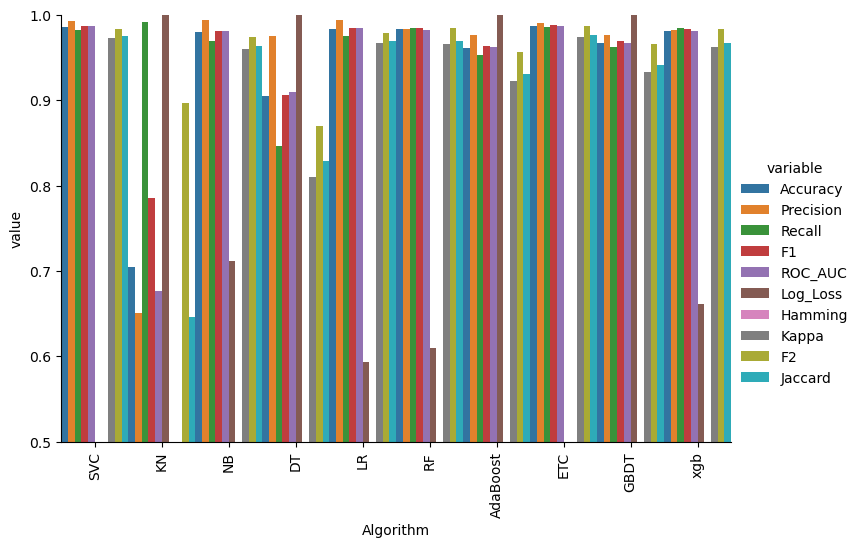

In [488]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df5, kind = 'bar', height = 5, width = 1.0, aspect = 1.5, dodge = True)

plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

<h3> 5. Model Improvement</h3>
<p></p>


In [259]:
# 1. Change the max_features parameter of the Tfidf

### Using an Ensemble Model that works by combining of a selected few of the models to generate a more effiecient one


<h4>Applying Stacking</h4>

<h4>Dataset 1</h4>

In [263]:
estimators = [('et', etc), ('rf', rfc), ('lr', lrc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X1_train, y1_train)

y_pred = clf.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y_pred))
print('Precision:', precision_score(y1_test, y_pred))
print('Recall:', recall_score(y1_test, y_pred))
print('F1:', f1_score(y1_test, y_pred))
print('ROC_AUC:', roc_auc_score(y1_test, y_pred))
print('Log_Loss:', log_loss(y1_test, y_pred))
print('Hamming:', hamming_loss(y1_test, y_pred))
print('Kappa:', cohen_kappa_score(y1_test, y_pred))
print('F2:', fbeta_score(y1_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y1_test, y_pred))

Accuracy: 0.9792626728110599
Precision: 0.994535519125683
Recall: 0.9578947368421052
F1: 0.9758713136729222
ROC_AUC: 0.9768981880931837
Log_Loss: 0.7474490334148721
Hamming: 0.020737327188940093
Kappa: 0.9577007212319422
F2: 0.9650053022269353
Jaccard: 0.9528795811518325


In [264]:
estimators = [('et', etc), ('rf', rfc), ('lr', lrc), ('xgb', xgb), ('nb', mnb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X1_train, y1_train)

y_pred = clf.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y_pred))
print('Precision:', precision_score(y1_test, y_pred))
print('Recall:', recall_score(y1_test, y_pred))
print('F1:', f1_score(y1_test, y_pred))
print('ROC_AUC:', roc_auc_score(y1_test, y_pred))
print('Log_Loss:', log_loss(y1_test, y_pred))
print('Hamming:', hamming_loss(y1_test, y_pred))
print('Kappa:', cohen_kappa_score(y1_test, y_pred))
print('F2:', fbeta_score(y1_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y1_test, y_pred))

Accuracy: 0.9792626728110599
Precision: 0.9972527472527473
Recall: 0.9552631578947368
F1: 0.9758064516129032
ROC_AUC: 0.976606988783434
Log_Loss: 0.7474490334148721
Hamming: 0.020737327188940093
Kappa: 0.9576759708737864
F2: 0.9633757961783439
Jaccard: 0.952755905511811


In [265]:
estimators = [('et', etc), ('lr', lrc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X1_train, y1_train)

y_pred = clf.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y_pred))
print('Precision:', precision_score(y1_test, y_pred))
print('Recall:', recall_score(y1_test, y_pred))
print('F1:', f1_score(y1_test, y_pred))
print('ROC_AUC:', roc_auc_score(y1_test, y_pred))
print('Log_Loss:', log_loss(y1_test, y_pred))
print('Hamming:', hamming_loss(y1_test, y_pred))
print('Kappa:', cohen_kappa_score(y1_test, y_pred))
print('F2:', fbeta_score(y1_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y1_test, y_pred))

Accuracy: 0.9792626728110599
Precision: 0.994535519125683
Recall: 0.9578947368421052
F1: 0.9758713136729222
ROC_AUC: 0.9768981880931837
Log_Loss: 0.7474490334148721
Hamming: 0.020737327188940093
Kappa: 0.9577007212319422
F2: 0.9650053022269353
Jaccard: 0.9528795811518325


In [266]:
estimators = [('et', etc), ('rf', rfc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X1_train, y1_train)

y_pred = clf.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y_pred))
print('Precision:', precision_score(y1_test, y_pred))
print('Recall:', recall_score(y1_test, y_pred))
print('F1:', f1_score(y1_test, y_pred))
print('ROC_AUC:', roc_auc_score(y1_test, y_pred))
print('Log_Loss:', log_loss(y1_test, y_pred))
print('Hamming:', hamming_loss(y1_test, y_pred))
print('Kappa:', cohen_kappa_score(y1_test, y_pred))
print('F2:', fbeta_score(y1_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y1_test, y_pred))

Accuracy: 0.9804147465437788
Precision: 0.991869918699187
Recall: 0.9631578947368421
F1: 0.9773030707610146
ROC_AUC: 0.9785051768766178
Log_Loss: 0.7059240871140459
Hamming: 0.019585253456221197
Kappa: 0.9600856929552167
F2: 0.9687665431445209
Jaccard: 0.9556135770234987


<h4>Dataset 2</h4>

In [268]:
estimators = [('et', etc), ('rf', rfc), ('lr', lrc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X2_train, y2_train)

y_pred = clf.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y_pred))
print('Precision:', precision_score(y2_test, y_pred))
print('Recall:', recall_score(y2_test, y_pred))
print('F1:', f1_score(y2_test, y_pred))
print('ROC_AUC:', roc_auc_score(y2_test, y_pred))
print('Log_Loss:', log_loss(y2_test, y_pred))
print('Hamming:', hamming_loss(y2_test, y_pred))
print('Kappa:', cohen_kappa_score(y2_test, y_pred))
print('F2:', fbeta_score(y2_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y2_test, y_pred))

Accuracy: 0.9796905222437138
Precision: 0.9606299212598425
Recall: 0.8840579710144928
F1: 0.9207547169811321
ROC_AUC: 0.9392388069358178
Log_Loss: 0.7320277767615669
Hamming: 0.020309477756286266
Kappa: 0.9091304748114731
F2: 0.898379970544919
Jaccard: 0.8531468531468531


In [269]:
estimators = [('et', etc), ('rf', rfc), ('lr', lrc), ('xgb', xgb), ('nb', mnb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X2_train, y2_train)

y_pred = clf.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y_pred))
print('Precision:', precision_score(y2_test, y_pred))
print('Recall:', recall_score(y2_test, y_pred))
print('F1:', f1_score(y2_test, y_pred))
print('ROC_AUC:', roc_auc_score(y2_test, y_pred))
print('Log_Loss:', log_loss(y2_test, y_pred))
print('Hamming:', hamming_loss(y2_test, y_pred))
print('Kappa:', cohen_kappa_score(y2_test, y_pred))
print('F2:', fbeta_score(y2_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y2_test, y_pred))

Accuracy: 0.9825918762088974
Precision: 0.9615384615384616
Recall: 0.9057971014492754
F1: 0.9328358208955224
ROC_AUC: 0.9501083721532091
Log_Loss: 0.6274523800813433
Hamming: 0.017408123791102514
Kappa: 0.9228460569078729
F2: 0.9164222873900293
Jaccard: 0.8741258741258742


In [270]:
estimators = [('et', etc), ('lr', lrc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X2_train, y2_train)

y_pred = clf.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y_pred))
print('Precision:', precision_score(y2_test, y_pred))
print('Recall:', recall_score(y2_test, y_pred))
print('F1:', f1_score(y2_test, y_pred))
print('ROC_AUC:', roc_auc_score(y2_test, y_pred))
print('Log_Loss:', log_loss(y2_test, y_pred))
print('Hamming:', hamming_loss(y2_test, y_pred))
print('Kappa:', cohen_kappa_score(y2_test, y_pred))
print('F2:', fbeta_score(y2_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y2_test, y_pred))

Accuracy: 0.9796905222437138
Precision: 0.968
Recall: 0.8768115942028986
F1: 0.9201520912547528
ROC_AUC: 0.9361736542443064
Log_Loss: 0.7320277767615669
Hamming: 0.020309477756286266
Kappa: 0.9085502985992369
F2: 0.8936484490398818
Jaccard: 0.852112676056338


In [271]:
estimators = [('et', etc), ('rf', rfc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X2_train, y2_train)

y_pred = clf.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y_pred))
print('Precision:', precision_score(y2_test, y_pred))
print('Recall:', recall_score(y2_test, y_pred))
print('F1:', f1_score(y2_test, y_pred))
print('ROC_AUC:', roc_auc_score(y2_test, y_pred))
print('Log_Loss:', log_loss(y2_test, y_pred))
print('Hamming:', hamming_loss(y2_test, y_pred))
print('Kappa:', cohen_kappa_score(y2_test, y_pred))
print('F2:', fbeta_score(y2_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y2_test, y_pred))

Accuracy: 0.9796905222437138
Precision: 0.968
Recall: 0.8768115942028986
F1: 0.9201520912547528
ROC_AUC: 0.9361736542443064
Log_Loss: 0.7320277767615672
Hamming: 0.020309477756286266
Kappa: 0.9085502985992369
F2: 0.8936484490398818
Jaccard: 0.852112676056338


<h4>Dataset 3</h4>

In [273]:
estimators = [('et', etc), ('rf', rfc), ('lr', lrc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X3_train, y3_train)

y_pred = clf.predict(X3_test)

print('Accuracy:', accuracy_score(y3_test, y_pred))
print('Precision:', precision_score(y3_test, y_pred))
print('Recall:', recall_score(y3_test, y_pred))
print('F1:', f1_score(y3_test, y_pred))
print('ROC_AUC:', roc_auc_score(y3_test, y_pred))
print('Log_Loss:', log_loss(y3_test, y_pred))
print('Hamming:', hamming_loss(y3_test, y_pred))
print('Kappa:', cohen_kappa_score(y3_test, y_pred))
print('F2:', fbeta_score(y3_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y3_test, y_pred))

Accuracy: 0.9778368794326241
Precision: 0.9635258358662614
Recall: 0.9606060606060606
F1: 0.9620637329286799
ROC_AUC: 0.972784233310549
Log_Loss: 0.7988398357517101
Hamming: 0.022163120567375887
Kappa: 0.9464094319399785
F2: 0.9611885991510006
Jaccard: 0.9269005847953217


In [274]:
estimators = [('et', etc), ('rf', rfc), ('lr', lrc), ('xgb', xgb), ('nb', mnb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X3_train, y3_train)

y_pred = clf.predict(X3_test)

print('Accuracy:', accuracy_score(y3_test, y_pred))
print('Precision:', precision_score(y3_test, y_pred))
print('Recall:', recall_score(y3_test, y_pred))
print('F1:', f1_score(y3_test, y_pred))
print('ROC_AUC:', roc_auc_score(y3_test, y_pred))
print('Log_Loss:', log_loss(y3_test, y_pred))
print('Hamming:', hamming_loss(y3_test, y_pred))
print('Kappa:', cohen_kappa_score(y3_test, y_pred))
print('F2:', fbeta_score(y3_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y3_test, y_pred))

Accuracy: 0.976063829787234
Precision: 0.9577039274924471
Recall: 0.9606060606060606
F1: 0.9591527987897126
ROC_AUC: 0.9715311004784688
Log_Loss: 0.8627470226118469
Hamming: 0.023936170212765957
Kappa: 0.9422249539028887
F2: 0.9600242277407631
Jaccard: 0.9215116279069767


In [275]:
estimators = [('et', etc), ('lr', lrc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X3_train, y3_train)

y_pred = clf.predict(X3_test)

print('Accuracy:', accuracy_score(y3_test, y_pred))
print('Precision:', precision_score(y3_test, y_pred))
print('Recall:', recall_score(y3_test, y_pred))
print('F1:', f1_score(y3_test, y_pred))
print('ROC_AUC:', roc_auc_score(y3_test, y_pred))
print('Log_Loss:', log_loss(y3_test, y_pred))
print('Hamming:', hamming_loss(y3_test, y_pred))
print('Kappa:', cohen_kappa_score(y3_test, y_pred))
print('F2:', fbeta_score(y3_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y3_test, y_pred))

Accuracy: 0.9778368794326241
Precision: 0.9635258358662614
Recall: 0.9606060606060606
F1: 0.9620637329286799
ROC_AUC: 0.972784233310549
Log_Loss: 0.7988398357517101
Hamming: 0.022163120567375887
Kappa: 0.9464094319399785
F2: 0.9611885991510006
Jaccard: 0.9269005847953217


In [276]:
estimators = [('et', etc), ('rf', rfc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X3_train, y3_train)

y_pred = clf.predict(X3_test)

print('Accuracy:', accuracy_score(y3_test, y_pred))
print('Precision:', precision_score(y3_test, y_pred))
print('Recall:', recall_score(y3_test, y_pred))
print('F1:', f1_score(y3_test, y_pred))
print('ROC_AUC:', roc_auc_score(y3_test, y_pred))
print('Log_Loss:', log_loss(y3_test, y_pred))
print('Hamming:', hamming_loss(y3_test, y_pred))
print('Kappa:', cohen_kappa_score(y3_test, y_pred))
print('F2:', fbeta_score(y3_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y3_test, y_pred))

Accuracy: 0.973404255319149
Precision: 0.9601226993865031
Recall: 0.9484848484848485
F1: 0.9542682926829268
ROC_AUC: 0.966097060833903
Log_Loss: 0.9586078029020522
Hamming: 0.026595744680851064
Kappa: 0.9355192756207985
F2: 0.9507897934386391
Jaccard: 0.9125364431486881


<h4>Dataset 5</h4>

In [327]:
estimators = [('et', etc), ('rf', rfc), ('lr', lrc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X5_train, y5_train)

y_pred = clf.predict(X5_test)

print('Accuracy:', accuracy_score(y5_test, y_pred))
print('Precision:', precision_score(y5_test, y_pred))
print('Recall:', recall_score(y5_test, y_pred))
print('F1:', f1_score(y5_test, y_pred))
print('ROC_AUC:', roc_auc_score(y5_test, y_pred))
print('Log_Loss:', log_loss(y5_test, y_pred))
print('Hamming:', hamming_loss(y5_test, y_pred))
print('Kappa:', cohen_kappa_score(y5_test, y_pred))
print('F2:', fbeta_score(y5_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y5_test, y_pred))

Accuracy: 0.9877704609595485
Precision: 0.9913269731136166
Recall: 0.9861949956859362
F1: 0.9887543252595156
ROC_AUC: 0.9879268670260084
Log_Loss: 0.4407972662827123
Hamming: 0.012229539040451553
Kappa: 0.9753524612312711
F2: 0.9872171359474866
Jaccard: 0.9777587681779298


In [328]:
estimators = [('et', etc), ('rf', rfc), ('lr', lrc), ('xgb', xgb), ('nb', mnb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X5_train, y5_train)

y_pred = clf.predict(X5_test)

print('Accuracy:', accuracy_score(y5_test, y_pred))
print('Precision:', precision_score(y5_test, y_pred))
print('Recall:', recall_score(y5_test, y_pred))
print('F1:', f1_score(y5_test, y_pred))
print('ROC_AUC:', roc_auc_score(y5_test, y_pred))
print('Log_Loss:', log_loss(y5_test, y_pred))
print('Hamming:', hamming_loss(y5_test, y_pred))
print('Kappa:', cohen_kappa_score(y5_test, y_pred))
print('F2:', fbeta_score(y5_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y5_test, y_pred))

Accuracy: 0.989181561618062
Precision: 0.9913494809688581
Recall: 0.9887834339948232
F1: 0.9900647948164147
ROC_AUC: 0.9892210861804519
Log_Loss: 0.3899360432500917
Hamming: 0.010818438381937912
Kappa: 0.9781908065806693
F2: 0.9892955801104972
Jaccard: 0.9803250641573995


In [329]:
estimators = [('et', etc), ('lr', lrc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X5_train, y5_train)

y_pred = clf.predict(X5_test)

print('Accuracy:', accuracy_score(y5_test, y_pred))
print('Precision:', precision_score(y5_test, y_pred))
print('Recall:', recall_score(y5_test, y_pred))
print('F1:', f1_score(y5_test, y_pred))
print('ROC_AUC:', roc_auc_score(y5_test, y_pred))
print('Log_Loss:', log_loss(y5_test, y_pred))
print('Hamming:', hamming_loss(y5_test, y_pred))
print('Kappa:', cohen_kappa_score(y5_test, y_pred))
print('F2:', fbeta_score(y5_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y5_test, y_pred))

Accuracy: 0.9877704609595485
Precision: 0.9904761904761905
Recall: 0.9870578084555651
F1: 0.9887640449438202
ROC_AUC: 0.987841210329127
Log_Loss: 0.4407972662827123
Hamming: 0.012229539040451553
Kappa: 0.9753482402239869
F2: 0.9877395959247107
Jaccard: 0.9777777777777777


In [330]:
estimators = [('et', etc), ('rf', rfc), ('xgb', xgb)]
final_estimator = SVC(kernel='linear', gamma='scale', probability=True, random_state=2)

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)

clf.fit(X5_train, y5_train)

y_pred = clf.predict(X5_test)

print('Accuracy:', accuracy_score(y5_test, y_pred))
print('Precision:', precision_score(y5_test, y_pred))
print('Recall:', recall_score(y5_test, y_pred))
print('F1:', f1_score(y5_test, y_pred))
print('ROC_AUC:', roc_auc_score(y5_test, y_pred))
print('Log_Loss:', log_loss(y5_test, y_pred))
print('Hamming:', hamming_loss(y5_test, y_pred))
print('Kappa:', cohen_kappa_score(y5_test, y_pred))
print('F2:', fbeta_score(y5_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y5_test, y_pred))

Accuracy: 0.9877704609595485
Precision: 0.989628349178911
Recall: 0.9879206212251941
F1: 0.9887737478411054
ROC_AUC: 0.9877555536322454
Log_Loss: 0.44079726628271226
Hamming: 0.012229539040451553
Kappa: 0.9753440177707202
F2: 0.9882616951493182
Jaccard: 0.977796754910333


<h4>Applying Voting</h4>

In [332]:
# Import the voting classifier and use it to combine mutiple models

from sklearn.ensemble import VotingClassifier

# First we can try out the top five using the important evaluation metrics: Accuracy and Precision

<h4>Dataset 1</h4>

In [334]:
ds1_voting1 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('nb', mnb), ('xg', xgb)], voting = 'soft') 
ds1_voting1.fit(X1_train, y1_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('nb', MultinomialNB()),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [335]:
y_pred = ds1_voting1.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y_pred))
print('Precision:', precision_score(y1_test, y_pred))
print('Recall:', recall_score(y1_test, y_pred))
print('F1:', f1_score(y1_test, y_pred))
print('ROC_AUC:', roc_auc_score(y1_test, y_pred))
print('Log_Loss:', log_loss(y1_test, y_pred))
print('Hamming:', hamming_loss(y1_test, y_pred))
print('Kappa:', cohen_kappa_score(y1_test, y_pred))
print('F2:', fbeta_score(y1_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y1_test, y_pred))

Accuracy: 0.9804147465437788
Precision: 0.9945504087193461
Recall: 0.9605263157894737
F1: 0.9772423025435074
ROC_AUC: 0.978213977566868
Log_Loss: 0.7059240871140459
Hamming: 0.019585253456221197
Kappa: 0.9600623585835074
F2: 0.9671436142024378
Jaccard: 0.9554973821989529


In [336]:
ds1_voting2 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('xg', xgb)], voting = 'soft') 
ds1_voting2.fit(X1_train, y1_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [337]:
y_pred = ds1_voting2.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y_pred))
print('Precision:', precision_score(y1_test, y_pred))
print('Recall:', recall_score(y1_test, y_pred))
print('F1:', f1_score(y1_test, y_pred))
print('ROC_AUC:', roc_auc_score(y1_test, y_pred))
print('Log_Loss:', log_loss(y1_test, y_pred))
print('Hamming:', hamming_loss(y1_test, y_pred))
print('Kappa:', cohen_kappa_score(y1_test, y_pred))
print('F2:', fbeta_score(y1_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y1_test, y_pred))

Accuracy: 0.9815668202764977
Precision: 0.9972677595628415
Recall: 0.9605263157894737
F1: 0.9785522788203753
ROC_AUC: 0.9792385677308024
Log_Loss: 0.6643991408132197
Hamming: 0.018433179723502304
Kappa: 0.9624006410950596
F2: 0.9676564156945917
Jaccard: 0.958005249343832


In [338]:
ds1_voting3 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('nb', mnb)], voting = 'soft') 
ds1_voting3.fit(X1_train, y1_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [339]:
y_pred = ds1_voting3.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y_pred))
print('Precision:', precision_score(y1_test, y_pred))
print('Recall:', recall_score(y1_test, y_pred))
print('F1:', f1_score(y1_test, y_pred))
print('ROC_AUC:', roc_auc_score(y1_test, y_pred))
print('Log_Loss:', log_loss(y1_test, y_pred))
print('Hamming:', hamming_loss(y1_test, y_pred))
print('Kappa:', cohen_kappa_score(y1_test, y_pred))
print('F2:', fbeta_score(y1_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y1_test, y_pred))

Accuracy: 0.9792626728110599
Precision: 0.994535519125683
Recall: 0.9578947368421052
F1: 0.9758713136729222
ROC_AUC: 0.9768981880931837
Log_Loss: 0.7474490334148721
Hamming: 0.020737327188940093
Kappa: 0.9577007212319422
F2: 0.9650053022269353
Jaccard: 0.9528795811518325


In [340]:
ds1_voting4 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('nb', mnb)], voting = 'soft') 
ds1_voting4.fit(X1_train, y1_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [341]:
y_pred = ds1_voting4.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y_pred))
print('Precision:', precision_score(y1_test, y_pred))
print('Recall:', recall_score(y1_test, y_pred))
print('F1:', f1_score(y1_test, y_pred))
print('ROC_AUC:', roc_auc_score(y1_test, y_pred))
print('Log_Loss:', log_loss(y1_test, y_pred))
print('Hamming:', hamming_loss(y1_test, y_pred))
print('Kappa:', cohen_kappa_score(y1_test, y_pred))
print('F2:', fbeta_score(y1_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y1_test, y_pred))

Accuracy: 0.9804147465437788
Precision: 0.9945504087193461
Recall: 0.9605263157894737
F1: 0.9772423025435074
ROC_AUC: 0.978213977566868
Log_Loss: 0.7059240871140458
Hamming: 0.019585253456221197
Kappa: 0.9600623585835074
F2: 0.9671436142024378
Jaccard: 0.9554973821989529


In [342]:
ds1_voting5 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc)], voting = 'soft') 
ds1_voting5.fit(X1_train, y1_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2))],
                 voting='soft')

In [343]:
y_pred = ds1_voting5.predict(X1_test)

print('Accuracy:', accuracy_score(y1_test, y_pred))
print('Precision:', precision_score(y1_test, y_pred))
print('Recall:', recall_score(y1_test, y_pred))
print('F1:', f1_score(y1_test, y_pred))
print('ROC_AUC:', roc_auc_score(y1_test, y_pred))
print('Log_Loss:', log_loss(y1_test, y_pred))
print('Hamming:', hamming_loss(y1_test, y_pred))
print('Kappa:', cohen_kappa_score(y1_test, y_pred))
print('F2:', fbeta_score(y1_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y1_test, y_pred))

Accuracy: 0.978110599078341
Precision: 0.9918256130790191
Recall: 0.9578947368421052
F1: 0.9745649263721553
ROC_AUC: 0.9758735979292492
Log_Loss: 0.7889739797156983
Hamming: 0.021889400921658985
Kappa: 0.9553638125345083
F2: 0.9644939056703763
Jaccard: 0.9503916449086162


<h4>Dataset 2</h4>

In [345]:
ds2_voting1 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('nb', mnb), ('xg', xgb)], voting = 'soft') 
ds2_voting1.fit(X2_train, y2_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('nb', MultinomialNB()),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [346]:
y_pred = ds2_voting1.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y_pred))
print('Precision:', precision_score(y2_test, y_pred))
print('Recall:', recall_score(y2_test, y_pred))
print('F1:', f1_score(y2_test, y_pred))
print('ROC_AUC:', roc_auc_score(y2_test, y_pred))
print('Log_Loss:', log_loss(y2_test, y_pred))
print('Hamming:', hamming_loss(y2_test, y_pred))
print('Kappa:', cohen_kappa_score(y2_test, y_pred))
print('F2:', fbeta_score(y2_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y2_test, y_pred))

Accuracy: 0.9796905222437138
Precision: 1.0
Recall: 0.8478260869565217
F1: 0.9176470588235294
ROC_AUC: 0.9239130434782609
Log_Loss: 0.732027776761567
Hamming: 0.020309477756286266
Kappa: 0.9061535668905427
F2: 0.874439461883408
Jaccard: 0.8478260869565217


In [347]:
ds2_voting2 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('xg', xgb)], voting = 'soft') 
ds2_voting2.fit(X2_train, y2_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [348]:
y_pred = ds2_voting2.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y_pred))
print('Precision:', precision_score(y2_test, y_pred))
print('Recall:', recall_score(y2_test, y_pred))
print('F1:', f1_score(y2_test, y_pred))
print('ROC_AUC:', roc_auc_score(y2_test, y_pred))
print('Log_Loss:', log_loss(y2_test, y_pred))
print('Hamming:', hamming_loss(y2_test, y_pred))
print('Kappa:', cohen_kappa_score(y2_test, y_pred))
print('F2:', fbeta_score(y2_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y2_test, y_pred))

Accuracy: 0.9796905222437138
Precision: 0.9915966386554622
Recall: 0.855072463768116
F1: 0.9182879377431906
ROC_AUC: 0.9269781961697723
Log_Loss: 0.732027776761567
Hamming: 0.020309477756286266
Kappa: 0.9067644507801833
F2: 0.879284649776453
Jaccard: 0.8489208633093526


In [349]:
ds2_voting3 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('nb', mnb)], voting = 'soft') 
ds2_voting3.fit(X2_train, y2_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [350]:
y_pred = ds2_voting3.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y_pred))
print('Precision:', precision_score(y2_test, y_pred))
print('Recall:', recall_score(y2_test, y_pred))
print('F1:', f1_score(y2_test, y_pred))
print('ROC_AUC:', roc_auc_score(y2_test, y_pred))
print('Log_Loss:', log_loss(y2_test, y_pred))
print('Hamming:', hamming_loss(y2_test, y_pred))
print('Kappa:', cohen_kappa_score(y2_test, y_pred))
print('F2:', fbeta_score(y2_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y2_test, y_pred))

Accuracy: 0.9796905222437138
Precision: 1.0
Recall: 0.8478260869565217
F1: 0.9176470588235294
ROC_AUC: 0.9239130434782609
Log_Loss: 0.732027776761567
Hamming: 0.020309477756286266
Kappa: 0.9061535668905427
F2: 0.874439461883408
Jaccard: 0.8478260869565217


In [351]:
ds2_voting4 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('nb', mnb)], voting = 'soft') 
ds2_voting4.fit(X2_train, y2_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [352]:
y_pred = ds2_voting4.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y_pred))
print('Precision:', precision_score(y2_test, y_pred))
print('Recall:', recall_score(y2_test, y_pred))
print('F1:', f1_score(y2_test, y_pred))
print('ROC_AUC:', roc_auc_score(y2_test, y_pred))
print('Log_Loss:', log_loss(y2_test, y_pred))
print('Hamming:', hamming_loss(y2_test, y_pred))
print('Kappa:', cohen_kappa_score(y2_test, y_pred))
print('F2:', fbeta_score(y2_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y2_test, y_pred))

Accuracy: 0.9806576402321083
Precision: 1.0
Recall: 0.855072463768116
F1: 0.921875
ROC_AUC: 0.927536231884058
Log_Loss: 0.6971693112014925
Hamming: 0.019342359767891684
Kappa: 0.9109142916221525
F2: 0.8805970149253731
Jaccard: 0.855072463768116


In [353]:
ds2_voting5 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc)], voting = 'soft') 
ds2_voting5.fit(X2_train, y2_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2))],
                 voting='soft')

In [354]:
y_pred = ds2_voting5.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y_pred))
print('Precision:', precision_score(y2_test, y_pred))
print('Recall:', recall_score(y2_test, y_pred))
print('F1:', f1_score(y2_test, y_pred))
print('ROC_AUC:', roc_auc_score(y2_test, y_pred))
print('Log_Loss:', log_loss(y2_test, y_pred))
print('Hamming:', hamming_loss(y2_test, y_pred))
print('Kappa:', cohen_kappa_score(y2_test, y_pred))
print('F2:', fbeta_score(y2_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y2_test, y_pred))

Accuracy: 0.9806576402321083
Precision: 0.9916666666666667
Recall: 0.8623188405797102
F1: 0.9224806201550387
ROC_AUC: 0.9306013845755694
Log_Loss: 0.6971693112014925
Hamming: 0.019342359767891684
Kappa: 0.9114923047951655
F2: 0.8854166666666666
Jaccard: 0.8561151079136691


<h4>Dataset 3</h4>

In [356]:
ds3_voting1 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('nb', mnb), ('xg', xgb)], voting = 'soft') 
ds3_voting1.fit(X3_train, y3_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('nb', MultinomialNB()),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [357]:
y_pred = ds3_voting1.predict(X3_test)

print('Accuracy:', accuracy_score(y3_test, y_pred))
print('Precision:', precision_score(y3_test, y_pred))
print('Recall:', recall_score(y3_test, y_pred))
print('F1:', f1_score(y3_test, y_pred))
print('ROC_AUC:', roc_auc_score(y3_test, y_pred))
print('Log_Loss:', log_loss(y3_test, y_pred))
print('Hamming:', hamming_loss(y3_test, y_pred))
print('Kappa:', cohen_kappa_score(y3_test, y_pred))
print('F2:', fbeta_score(y3_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y3_test, y_pred))

Accuracy: 0.974290780141844
Precision: 0.9688473520249221
Recall: 0.9424242424242424
F1: 0.9554531490015361
ROC_AUC: 0.9649464570517202
Log_Loss: 0.9266542094719837
Hamming: 0.025709219858156027
Kappa: 0.9373894669147201
F2: 0.947592931139549
Jaccard: 0.9147058823529411


In [358]:
ds3_voting2 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('xg', xgb)], voting = 'soft') 
ds3_voting2.fit(X3_train, y3_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [391]:
y_pred = ds3_voting2.predict(X3_test)

print('Accuracy:', accuracy_score(y3_test, y_pred))
print('Precision:', precision_score(y3_test, y_pred))
print('Recall:', recall_score(y3_test, y_pred))
print('F1:', f1_score(y3_test, y_pred))
print('ROC_AUC:', roc_auc_score(y3_test, y_pred))
print('Log_Loss:', log_loss(y3_test, y_pred))
print('Hamming:', hamming_loss(y3_test, y_pred))
print('Kappa:', cohen_kappa_score(y3_test, y_pred))
print('F2:', fbeta_score(y3_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y3_test, y_pred))

Accuracy: 0.976063829787234
Precision: 0.9719626168224299
Recall: 0.9454545454545454
F1: 0.9585253456221198
ROC_AUC: 0.9670881749829118
Log_Loss: 0.8627470226118469
Hamming: 0.023936170212765957
Kappa: 0.941707434713705
F2: 0.9506398537477148
Jaccard: 0.9203539823008849


In [360]:
ds3_voting3 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('nb', mnb)], voting = 'soft') 
ds3_voting3.fit(X3_train, y3_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [393]:
y_pred = ds3_voting3.predict(X3_test)

print('Accuracy:', accuracy_score(y3_test, y_pred))
print('Precision:', precision_score(y3_test, y_pred))
print('Recall:', recall_score(y3_test, y_pred))
print('F1:', f1_score(y3_test, y_pred))
print('ROC_AUC:', roc_auc_score(y3_test, y_pred))
print('Log_Loss:', log_loss(y3_test, y_pred))
print('Hamming:', hamming_loss(y3_test, y_pred))
print('Kappa:', cohen_kappa_score(y3_test, y_pred))
print('F2:', fbeta_score(y3_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y3_test, y_pred))

Accuracy: 0.9725177304964538
Precision: 0.9716088328075709
Recall: 0.9333333333333333
F1: 0.9520865533230294
ROC_AUC: 0.9610275689223058
Log_Loss: 0.9905613963321205
Hamming: 0.0274822695035461
Kappa: 0.9328308323536869
F2: 0.9407452657299938
Jaccard: 0.9085545722713865


In [362]:
ds3_voting4 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('nb', mnb)], voting = 'soft') 
ds3_voting4.fit(X3_train, y3_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [363]:
y_pred = ds3_voting4.predict(X3_test)

print('Accuracy:', accuracy_score(y3_test, y_pred))
print('Precision:', precision_score(y3_test, y_pred))
print('Recall:', recall_score(y3_test, y_pred))
print('F1:', f1_score(y3_test, y_pred))
print('ROC_AUC:', roc_auc_score(y3_test, y_pred))
print('Log_Loss:', log_loss(y3_test, y_pred))
print('Hamming:', hamming_loss(y3_test, y_pred))
print('Kappa:', cohen_kappa_score(y3_test, y_pred))
print('F2:', fbeta_score(y3_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y3_test, y_pred))

Accuracy: 0.973404255319149
Precision: 0.9716981132075472
Recall: 0.9363636363636364
F1: 0.9537037037037037
ROC_AUC: 0.9625427204374574
Log_Loss: 0.9586078029020522
Hamming: 0.026595744680851064
Kappa: 0.9350559624153655
F2: 0.9432234432234432
Jaccard: 0.911504424778761


In [364]:
ds3_voting5 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc)], voting = 'soft') 
ds3_voting5.fit(X3_train, y3_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2))],
                 voting='soft')

In [365]:
y_pred = ds3_voting5.predict(X3_test)

print('Accuracy:', accuracy_score(y3_test, y_pred))
print('Precision:', precision_score(y3_test, y_pred))
print('Recall:', recall_score(y3_test, y_pred))
print('F1:', f1_score(y3_test, y_pred))
print('ROC_AUC:', roc_auc_score(y3_test, y_pred))
print('Log_Loss:', log_loss(y3_test, y_pred))
print('Hamming:', hamming_loss(y3_test, y_pred))
print('Kappa:', cohen_kappa_score(y3_test, y_pred))
print('F2:', fbeta_score(y3_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y3_test, y_pred))

Accuracy: 0.974290780141844
Precision: 0.9717868338557993
Recall: 0.9393939393939394
F1: 0.9553158705701078
ROC_AUC: 0.9640578719526088
Log_Loss: 0.9266542094719837
Hamming: 0.025709219858156027
Kappa: 0.9372770990083064
F2: 0.9456985967053081
Jaccard: 0.9144542772861357


<h4>Dataset 5</h4>

In [367]:
ds5_voting1 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('nb', mnb), ('xg', xgb)], voting = 'soft') 
ds5_voting1.fit(X5_train, y5_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('nb', MultinomialNB()),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [368]:
y_pred = ds5_voting1.predict(X5_test)

print('Accuracy:', accuracy_score(y5_test, y_pred))
print('Precision:', precision_score(y5_test, y_pred))
print('Recall:', recall_score(y5_test, y_pred))
print('F1:', f1_score(y5_test, y_pred))
print('ROC_AUC:', roc_auc_score(y5_test, y_pred))
print('Log_Loss:', log_loss(y5_test, y_pred))
print('Hamming:', hamming_loss(y5_test, y_pred))
print('Kappa:', cohen_kappa_score(y5_test, y_pred))
print('F2:', fbeta_score(y5_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y5_test, y_pred))

Accuracy: 0.9901222953904045
Precision: 0.9947826086956522
Recall: 0.9870578084555651
F1: 0.9909051537462105
ROC_AUC: 0.9904265257376068
Log_Loss: 0.3560285612283446
Hamming: 0.009877704609595485
Kappa: 0.9800974842571039
F2: 0.9885931558935361
Jaccard: 0.9819742489270387


In [369]:
ds5_voting2 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('xg', xgb)], voting = 'soft') 
ds5_voting2.fit(X5_train, y5_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [370]:
y_pred = ds5_voting2.predict(X5_test)

print('Accuracy:', accuracy_score(y5_test, y_pred))
print('Precision:', precision_score(y5_test, y_pred))
print('Recall:', recall_score(y5_test, y_pred))
print('F1:', f1_score(y5_test, y_pred))
print('ROC_AUC:', roc_auc_score(y5_test, y_pred))
print('Log_Loss:', log_loss(y5_test, y_pred))
print('Hamming:', hamming_loss(y5_test, y_pred))
print('Kappa:', cohen_kappa_score(y5_test, y_pred))
print('F2:', fbeta_score(y5_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y5_test, y_pred))

Accuracy: 0.989181561618062
Precision: 0.9913494809688581
Recall: 0.9887834339948232
F1: 0.9900647948164147
ROC_AUC: 0.9892210861804519
Log_Loss: 0.3899360432500917
Hamming: 0.010818438381937912
Kappa: 0.9781908065806693
F2: 0.9892955801104972
Jaccard: 0.9803250641573995


In [371]:
ds5_voting3 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc), ('nb', mnb)], voting = 'soft') 
ds5_voting3.fit(X5_train, y5_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [372]:
y_pred = ds5_voting3.predict(X5_test)

print('Accuracy:', accuracy_score(y5_test, y_pred))
print('Precision:', precision_score(y5_test, y_pred))
print('Recall:', recall_score(y5_test, y_pred))
print('F1:', f1_score(y5_test, y_pred))
print('ROC_AUC:', roc_auc_score(y5_test, y_pred))
print('Log_Loss:', log_loss(y5_test, y_pred))
print('Hamming:', hamming_loss(y5_test, y_pred))
print('Kappa:', cohen_kappa_score(y5_test, y_pred))
print('F2:', fbeta_score(y5_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y5_test, y_pred))

Accuracy: 0.9896519285042333
Precision: 0.9939183318853171
Recall: 0.9870578084555651
F1: 0.9904761904761905
ROC_AUC: 0.9899094626559108
Log_Loss: 0.37298230223921813
Hamming: 0.010348071495766699
Kappa: 0.979147960671267
F2: 0.9884223259028858
Jaccard: 0.9811320754716981


In [373]:
ds5_voting4 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('nb', mnb)], voting = 'soft') 
ds5_voting4.fit(X5_train, y5_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [374]:
y_pred = ds5_voting4.predict(X5_test)

print('Accuracy:', accuracy_score(y5_test, y_pred))
print('Precision:', precision_score(y5_test, y_pred))
print('Recall:', recall_score(y5_test, y_pred))
print('F1:', f1_score(y5_test, y_pred))
print('ROC_AUC:', roc_auc_score(y5_test, y_pred))
print('Log_Loss:', log_loss(y5_test, y_pred))
print('Hamming:', hamming_loss(y5_test, y_pred))
print('Kappa:', cohen_kappa_score(y5_test, y_pred))
print('F2:', fbeta_score(y5_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y5_test, y_pred))

Accuracy: 0.9901222953904045
Precision: 0.9939236111111112
Recall: 0.9879206212251941
F1: 0.9909130246646474
ROC_AUC: 0.9903408690407253
Log_Loss: 0.3560285612283446
Hamming: 0.009877704609595485
Kappa: 0.9800940767327284
F2: 0.9891154111955771
Jaccard: 0.9819897084048027


In [375]:
ds5_voting5 = VotingClassifier(estimators = [('svm', svc), ('rf', rfc), ('et', etc), ('lr', lrc)], voting = 'soft') 
ds5_voting5.fit(X5_train, y5_train)

VotingClassifier(estimators=[('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lr', LogisticRegression(random_state=2))],
                 voting='soft')

In [376]:
y_pred = ds5_voting5.predict(X5_test)

print('Accuracy:', accuracy_score(y5_test, y_pred))
print('Precision:', precision_score(y5_test, y_pred))
print('Recall:', recall_score(y5_test, y_pred))
print('F1:', f1_score(y5_test, y_pred))
print('ROC_AUC:', roc_auc_score(y5_test, y_pred))
print('Log_Loss:', log_loss(y5_test, y_pred))
print('Hamming:', hamming_loss(y5_test, y_pred))
print('Kappa:', cohen_kappa_score(y5_test, y_pred))
print('F2:', fbeta_score(y5_test, y_pred, beta=2))
print('Jaccard:', jaccard_score(y5_test, y_pred))

Accuracy: 0.9877704609595485
Precision: 0.9904761904761905
Recall: 0.9870578084555651
F1: 0.9887640449438202
ROC_AUC: 0.987841210329127
Log_Loss: 0.44079726628271226
Hamming: 0.012229539040451553
Kappa: 0.9753482402239869
F2: 0.9877395959247107
Jaccard: 0.9777777777777777


In [464]:
input_sms = "Get as low as $4000 discount on all sales by texting this number 0123-456-789. Text STOP to opt out"
input_sms2 = "Love is a beautiful thing, you know"

transformed_sms = transform_text(input_sms)
transformed_sms2 = transform_text(input_sms2)

In [466]:
vector_input = tfidf.transform([transformed_sms]).toarray()
result = ds5_voting5.predict(vector_input)[0]

if result == 1:
    print('Spam')
else:
    print('Ham')

Spam


In [468]:
vector_input2 = tfidf.transform([transformed_sms2]).toarray()
result = ds5_voting5.predict(vector_input2)[0]

if result == 1:
    print('Spam')
else:
    print('Ham')

Ham
